# Sentiment Classification & How To "Frame Problems" for a Neural Network

by Andrew Trask

- **Twitter**: @iamtrask
- **Blog**: http://iamtrask.github.io

### What You Should Already Know

- neural networks, forward and back-propagation
- stochastic gradient descent
- mean squared error
- and train/test splits

### Where to Get Help if You Need it
- Re-watch previous Udacity Lectures
- Leverage the recommended Course Reading Material - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) (Check inside your classroom for a discount code)
- Shoot me a tweet @iamtrask


### Tutorial Outline:

- Intro: The Importance of "Framing a Problem" (this lesson)

- [Curate a Dataset](#lesson_1)
- [Developing a "Predictive Theory"](#lesson_2)
- [**PROJECT 1**: Quick Theory Validation](#project_1)


- [Transforming Text to Numbers](#lesson_3)
- [**PROJECT 2**: Creating the Input/Output Data](#project_2)


- Putting it all together in a Neural Network (video only - nothing in notebook)
- [**PROJECT 3**: Building our Neural Network](#project_3)


- [Understanding Neural Noise](#lesson_4)
- [**PROJECT 4**: Making Learning Faster by Reducing Noise](#project_4)


- [Analyzing Inefficiencies in our Network](#lesson_5)
- [**PROJECT 5**: Making our Network Train and Run Faster](#project_5)


- [Further Noise Reduction](#lesson_6)
- [**PROJECT 6**: Reducing Noise by Strategically Reducing the Vocabulary](#project_6)


- [Analysis: What's going on in the weights?](#lesson_7)

# Lesson: Curate a Dataset<a id='lesson_1'></a>
The cells from here until Project 1 include code Andrew shows in the videos leading up to mini project 1. We've included them so you can run the code along with the videos without having to type in everything.

In [1]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

**Note:** The data in `reviews.txt` we're using has already been preprocessed a bit and contains only lower case characters. If we were working from raw data, where we didn't know it was all lower case, we would want to add a step here to convert it. That's so we treat different variations of the same word, like `The`, `the`, and `THE`, all the same way.

In [2]:
len(reviews)

25000

In [3]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [4]:
labels[0]

'POSITIVE'

# Lesson: Develop a Predictive Theory<a id='lesson_2'></a>

In [5]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Project 1: Quick Theory Validation<a id='project_1'></a>

There are multiple ways to implement these projects, but in order to get your code closer to what Andrew shows in his solutions, we've provided some hints and starter code throughout this notebook.

You'll find the [Counter](https://docs.python.org/2/library/collections.html#collections.Counter) class to be useful in this exercise, as well as the [numpy](https://docs.scipy.org/doc/numpy/reference/) library.

In [6]:
from collections import Counter
import numpy as np

We'll create three `Counter` objects, one for words from postive reviews, one for words from negative reviews, and one for all the words.

In [7]:
# Create three Counter objects to store positive, negative and total counts
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

**TODO:** Examine all the reviews. For each word in a positive review, increase the count for that word in both your positive counter and the total words counter; likewise, for each word in a negative review, increase the count for that word in both your negative counter and the total words counter.

**Note:** Throughout these projects, you should use `split(' ')` to divide a piece of text (such as a review) into individual words. If you use `split()` instead, you'll get slightly different results than what the videos and solutions show.

In [8]:
# TODO: Loop over all the words in all the reviews and increment the counts in the appropriate counter objects
for idx, review in enumerate(reviews):
    label = labels[idx]
    words = review.split(' ')
    for word in words:
        if label == "NEGATIVE":
            negative_counts[word] += 1
        if label == "POSITIVE":
            positive_counts[word] += 1
        total_counts[word] += 1

Run the following two cells to list the words used in positive reviews and negative reviews, respectively, ordered from most to least commonly used. 

In [9]:
# Examine the counts of the most common words in positive reviews
positive_counts.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [10]:
# Examine the counts of the most common words in negative reviews
negative_counts.most_common()

[('', 561462),
 ('.', 167538),
 ('the', 163389),
 ('a', 79321),
 ('and', 74385),
 ('of', 69009),
 ('to', 68974),
 ('br', 52637),
 ('is', 50083),
 ('it', 48327),
 ('i', 46880),
 ('in', 43753),
 ('this', 40920),
 ('that', 37615),
 ('s', 31546),
 ('was', 26291),
 ('movie', 24965),
 ('for', 21927),
 ('but', 21781),
 ('with', 20878),
 ('as', 20625),
 ('t', 20361),
 ('film', 19218),
 ('you', 17549),
 ('on', 17192),
 ('not', 16354),
 ('have', 15144),
 ('are', 14623),
 ('be', 14541),
 ('he', 13856),
 ('one', 13134),
 ('they', 13011),
 ('at', 12279),
 ('his', 12147),
 ('all', 12036),
 ('so', 11463),
 ('like', 11238),
 ('there', 10775),
 ('just', 10619),
 ('by', 10549),
 ('or', 10272),
 ('an', 10266),
 ('who', 9969),
 ('from', 9731),
 ('if', 9518),
 ('about', 9061),
 ('out', 8979),
 ('what', 8422),
 ('some', 8306),
 ('no', 8143),
 ('her', 7947),
 ('even', 7687),
 ('can', 7653),
 ('has', 7604),
 ('good', 7423),
 ('bad', 7401),
 ('would', 7036),
 ('up', 6970),
 ('only', 6781),
 ('more', 6730),
 ('

As you can see, common words like "the" appear very often in both positive and negative reviews. Instead of finding the most common words in positive or negative reviews, what you really want are the words found in positive reviews more often than in negative reviews, and vice versa. To accomplish this, you'll need to calculate the **ratios** of word usage between positive and negative reviews.

**TODO:** Check all the words you've seen and calculate the ratio of postive to negative uses and store that ratio in `pos_neg_ratios`. 
>Hint: the positive-to-negative ratio for a given word can be calculated with `positive_counts[word] / float(negative_counts[word]+1)`. Notice the `+1` in the denominator – that ensures we don't divide by zero for words that are only seen in positive reviews.

In [11]:
# Create Counter object to store positive/negative ratios
pos_neg_ratios = Counter()

# TODO: Calculate the ratios of positive and negative uses of the most common words
#       Consider words to be "common" if they've been used at least 100 times
for word, count in total_counts.items():
    pos_neg_ratios[word] = float(positive_counts[word] + 1) / float(negative_counts[word] + 1)

Examine the ratios you've calculated for a few words:

In [12]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 1.060805434849134
Pos-to-neg ratio for 'amazing' = 4.026615969581749
Pos-to-neg ratio for 'terrible' = 0.1781609195402299


Looking closely at the values you just calculated, we see the following:

* Words that you would expect to see more often in positive reviews – like "amazing" – have a ratio greater than 1. The more skewed a word is toward postive, the farther from 1 its positive-to-negative ratio  will be.
* Words that you would expect to see more often in negative reviews – like "terrible" – have positive values that are less than 1. The more skewed a word is toward negative, the closer to zero its positive-to-negative ratio will be.
* Neutral words, which don't really convey any sentiment because you would expect to see them in all sorts of reviews – like "the" – have values very close to 1. A perfectly neutral word – one that was used in exactly the same number of positive reviews as negative reviews – would be almost exactly 1. The `+1` we suggested you add to the denominator slightly biases words toward negative, but it won't matter because it will be a tiny bias and later we'll be ignoring words that are too close to neutral anyway.

Ok, the ratios tell us which words are used more often in postive or negative reviews, but the specific values we've calculated are a bit difficult to work with. A very positive word like "amazing" has a value above 4, whereas a very negative word like "terrible" has a value around 0.18. Those values aren't easy to compare for a couple of reasons:

* Right now, 1 is considered neutral, but the absolute value of the postive-to-negative rations of very postive words is larger than the absolute value of the ratios for the very negative words. So there is no way to directly compare two numbers and see if one word conveys the same magnitude of positive sentiment as another word conveys negative sentiment. So we should center all the values around netural so the absolute value fro neutral of the postive-to-negative ratio for a word would indicate how much sentiment (positive or negative) that word conveys.
* When comparing absolute values it's easier to do that around zero than one. 

To fix these issues, we'll convert all of our ratios to new values using logarithms.

**TODO:** Go through all the ratios you calculated and convert them to logarithms. (i.e. use `np.log(ratio)`)

In the end, extremely positive and extremely negative words will have positive-to-negative ratios with similar magnitudes but opposite signs.

In [13]:
# TODO: Convert ratios to logs
for word, ratio in pos_neg_ratios.items():
    print(word, ratio)
    pos_neg_ratios[word] = np.log(ratio)

bromwell 9.0
high 1.0271790065604498
is 1.1429997604025237
a 1.055054083356446
cartoon 0.8417508417508418
comedy 1.158139534883721
. 0.9529423000017906
it 0.993751034596921
ran 1.0512820512820513
at 0.9149022801302932
the 1.060805434849134
same 0.9476464937560038
time 1.0492753623188407
as 1.2755260351013284
some 0.8958709522089804
other 1.1284254528564794
programs 1.4285714285714286
about 0.9174575148973736
school 0.8939566704675028
life 1.728395061728395
 0.9804190124727721
such 1.0180746561886052
teachers 0.8372093023255814
my 1.078623670212766
years 1.5676136363636364
in 1.147689354116195
teaching 0.9534883720930233
profession 1.3103448275862069
lead 0.9265785609397944
me 0.9217050115926521
to 0.9676984414642986
believe 0.7470383275261324
that 0.9472299021692897
s 1.0719244302152344
satire 1.0873015873015872
much 0.9226225634967513
closer 1.5679012345679013
reality 1.5822454308093994
than 0.9137731481481481
scramble 0.6
survive 1.2982456140350878
financially 2.1
insightful 1.615384

followable 1.0
leslie 2.125
rated 0.8405797101449275
moments 1.2742155525238745
fleshed 1.4166666666666667
probably 0.9681660899653979
room 1.0700218818380745
worth 1.1550094517958411
price 1.4545454545454546
rent 0.4968944099378882
overall 1.359016393442623
job 1.8205445544554455
characteristic 1.2380952380952381
speaking 0.8333333333333334
directly 0.9696969696969697
actor 1.015177065767285
fume 1.0
both 1.9404659188955997
played 1.544204322200393
parts 1.1809872029250457
parents 1.459807073954984
took 1.0714285714285714
theater 0.7436974789915967
interiors 0.6538461538461539
watched 0.958005249343832
we 1.0380934509288797
walked 0.3310810810810811
recently 1.665137614678899
lived 1.3850931677018634
rest 0.7644183773216031
pretentious 0.30917874396135264
ponderous 0.2727272727272727
painfully 0.3224043715846995
piece 0.7389830508474576
wine 1.375
cheese 0.3333333333333333
tripe 0.0958904109589041
woody 1.0862068965517242
allen 1.4023668639053255
directors 1.0178571428571428
worst 0.1

foul 0.8524590163934426
mouthed 0.6285714285714286
parrot 6.285714285714286
rephrase 0.16666666666666666
quentin 0.875
tarantino 0.5555555555555556
bird 1.6136363636363635
hokum 0.4
harmless 0.9210526315789473
absolutely 0.763938315539739
enthralled 3.125
gripping 5.608695652173913
intense 2.9770114942528734
spot 1.2951807228915662
phone 0.6313131313131313
ring 1.6752136752136753
itself 0.9428571428571428
soundly 3.0
edge 2.210144927536232
evening 1.4554455445544554
casting 0.9654088050314465
bits 0.8385093167701864
humor 1.268166089965398
sprinkled 0.5263157894736842
points 0.888631090487239
gone 1.0106382978723405
thrill 1.2156862745098038
thrillers 2.642857142857143
spotless 1.0
netherworld 1.0
biggest 0.717607973421927
sin 1.2714285714285714
commit 0.7671232876712328
defying 0.8
traffic 0.6829268292682927
ticket 1.0
opens 1.2695652173913043
female 0.7426470588235294
auto 0.8
fanatic 1.0769230769230769
business 1.5180722891566265
arch 0.7391304347826086
pressures 3.4285714285714284


ka 3.125
khialdi 0.5
completion 1.4
ropes 1.0
childish 0.6527777777777778
handle 0.8571428571428571
amitabh 0.7636363636363637
zanjeer 0.5
deewar 0.3333333333333333
effective 1.9710982658959537
visually 1.8064516129032258
acquire 0.5238095238095238
strongly 1.6352941176470588
mpaa 0.8
pg 0.5102040816326531
thematic 2.2222222222222223
elements 1.2364672364672364
prolonged 0.4074074074074074
disastor 2.0
nudity 0.41509433962264153
hue 1.5
leaner 0.6666666666666666
accepted 1.1159420289855073
accept 1.4552845528455285
customers 1.2857142857142858
fools 0.6470588235294118
swat 0.2608695652173913
squad 0.7674418604651163
teeters 1.0
nab 0.75
criminals 1.2278481012658229
policemen 1.4444444444444444
surround 2.8333333333333335
palace 2.44
bullet 0.6323529411764706
touched 2.8222222222222224
retirement 1.0
writes 0.7777777777777778
tragic 2.977272727272727
talked 0.8823529411764706
criticised 1.4285714285714286
replace 0.9047619047619048
impossible 0.8470149253731343
simple 2.1124620060790273

sam 1.0176211453744493
hamm 0.5
themes 2.5714285714285716
tenuous 0.9
ecological 0.6666666666666666
intent 0.5657894736842105
ramming 0.5
throats 0.3448275862068966
whenever 0.8888888888888888
interpreted 2.7777777777777777
meaningful 0.9864864864864865
inconsistencies 0.6153846153846154
attendant 0.68
casually 0.7142857142857143
neck 0.9066666666666666
bloke 0.56
knowing 1.7654320987654322
bible 0.44680851063829785
notion 0.9629629629629629
states 1.3636363636363635
divine 3.5384615384615383
gays 0.46153846153846156
instance 0.8653846153846154
conveniently 0.2826086956521739
presumably 0.449438202247191
everyday 3.1219512195121952
plotting 0.8181818181818182
round 1.2363636363636363
rejected 0.9230769230769231
bright 0.8092105263157895
neon 0.9333333333333333
qualify 0.5151515151515151
loose 0.8918918918918919
subsequent 2.5142857142857142
stabbed 0.2619047619047619
bottle 1.0666666666666667
stabs 0.4642857142857143
groin 0.5714285714285714
stomach 0.46956521739130436
stood 1.8125
bea

moviegoers 1.3076923076923077
michelle 1.5588235294117647
pfeiffer 3.5833333333333335
evidently 0.574468085106383
signing 0.8571428571428571
contracts 1.0
evident 1.1864406779661016
express 1.1222222222222222
embarrassment 0.13953488372093023
humiliating 0.5789473684210527
routines 1.7142857142857142
tuneless 0.6666666666666666
maxwell 0.5384615384615384
caulfield 0.08333333333333333
skill 1.4594594594594594
gamut 1.125
numb 1.2727272727272727
catatonic 0.3333333333333333
hormones 0.4444444444444444
sassy 4.285714285714286
deadpan 1.2352941176470589
linger 1.5555555555555556
luau 1.0
cameos 1.2769230769230768
veterans 1.8333333333333333
eve 0.8888888888888888
arden 1.4285714285714286
connie 2.3846153846153846
sid 1.9642857142857142
caesar 0.5833333333333334
lorna 0.5
luft 2.0
clunker 0.14285714285714285
frenetic 3.25
exhausted 1.3571428571428572
dissipates 0.4
resemblance 0.8793103448275862
patricia 1.8846153846153846
birch 0.5
inflicted 0.4782608695652174
inept 0.21232876712328766
see

everybody 1.2445652173913044
comprehension 0.7333333333333333
limits 1.5897435897435896
attractive 0.8586387434554974
voil 1.0
contradictive 1.5
blends 4.5
philosophical 1.0612244897959184
prepare 0.7727272727272727
fool 1.0462962962962963
banned 0.6417910447761194
shelves 0.6956521739130435
swiss 1.1
romp 1.7666666666666666
pairings 3.6666666666666665
fading 2.111111111111111
prominence 3.6666666666666665
kay 0.7692307692307693
kyser 0.18181818181818182
spike 1.1774193548387097
jones 0.8378378378378378
band 1.1585365853658536
hugh 1.6511627906976745
buddy 1.03125
hackett 7.0
rumor 1.0
lou 0.5555555555555556
costello 1.0
abbott 1.6666666666666667
replacing 0.4482758620689655
pile 0.19428571428571428
insultingly 0.058823529411764705
responsible 0.8657718120805369
sadism 0.46153846153846156
spanking 1.25
resemble 0.782608695652174
scantily 0.4583333333333333
decorated 1.8888888888888888
pitiful 0.2
urge 0.8571428571428571
neutral 1.5384615384615385
generous 0.3263157894736842
vhs 2.65384

continuous 1.4666666666666666
adultery 0.9523809523809523
accident 0.9875776397515528
unharmed 0.9
artificially 0.7692307692307693
sleazy 1.024390243902439
attorney 1.5277777777777777
dentist 3.1621621621621623
plug 0.875
constructor 2.0
abbey 12.0
media 1.467741935483871
campaign 1.0571428571428572
vegetable 0.375
devices 1.0263157894736843
realizes 2.2950819672131146
safer 2.1666666666666665
stupendous 1.4285714285714286
sleaze 0.5714285714285714
obligatory 0.7142857142857143
circus 1.3870967741935485
surrounds 1.8181818181818181
processed 1.0
unnecessarily 0.35294117647058826
reverting 3.5
standpoints 3.0
lessons 1.3134328358208955
suitably 1.4482758620689655
voluptuous 1.7142857142857142
racks 1.2
egocentric 0.6
bastard 0.72
tech 1.048780487804878
secondly 0.40789473684210525
transformers 2.25
thirdly 0.2777777777777778
seagle 0.5
selected 0.9666666666666667
sidewinder 0.3333333333333333
trigger 1.0384615384615385
mysteriously 0.4473684210526316
missiles 0.45454545454545453
assign 

demoralize 2.0
declares 1.5384615384615385
bombings 3.0
bumper 1.75
slogan 2.0
suess 0.6
analogies 0.375
theodore 1.0454545454545454
rhymes 0.5
climate 4.428571428571429
justified 0.8857142857142857
orion 0.5
bankruptcy 0.5555555555555556
remembering 1.0714285714285714
debating 0.5333333333333333
disappointments 1.1818181818181819
krabb 2.6666666666666665
vanishing 1.5
spoorloos 2.0
koolhoven 4.0
lyric 3.4
sting 2.375
magazines 1.0476190476190477
honoust 3.0
dutch 1.2083333333333333
grot 9.0
boundaries 1.45
chew 0.5483870967741935
gump 0.625
fairy 1.5411764705882354
extraordinarily 1.2222222222222223
tgmb 0.5
relies 0.5571428571428572
archetype 0.8888888888888888
finnegan 1.5
hugging 0.6153846153846154
mlk 0.4
criminey 0.3333333333333333
groovay 0.5
ucla 1.3333333333333333
uh 0.30357142857142855
brat 0.3
whine 0.3125
prop 0.5333333333333333
racially 1.0
dazed 1.25
randall 3.6363636363636362
floyd 2.375
inviting 0.9333333333333333
nerdish 1.0
feminism 0.7333333333333333
knocked 0.695652

nil 0.5
spearheading 0.5
carradine 0.4117647058823529
lookalike 0.9090909090909091
pursuit 1.9
shadows 1.5869565217391304
spookiness 1.0
perky 1.3333333333333333
chalk 1.2857142857142858
partakes 3.0
justifies 1.1
cafe 2.2
coupons 5.0
sugary 1.0
rudeness 1.5
bum 1.6153846153846154
guard 1.0119047619047619
disposition 1.2857142857142858
pessimistic 1.75
mesh 1.5714285714285714
ties 1.3043478260869565
lucked 1.5
sensible 0.8484848484848485
persona 1.3888888888888888
anytime 1.434782608695652
ferrell 0.7241379310344828
carey 2.3333333333333335
truman 7.125
discount 0.391304347826087
talledega 0.5
nights 0.9701492537313433
thompson 1.0714285714285714
maggie 1.5476190476190477
gyllenhaal 4.0
harvard 0.6
marc 3.764705882352941
forster 0.2222222222222222
jazz 1.7073170731707317
prestige 0.5
opted 0.6428571428571429
showcasing 2.1666666666666665
budding 1.5294117647058822
cognoscenti 4.0
pretension 0.625
relying 1.45
characterizations 1.9411764705882353
rumination 2.0
interconnection 1.5
affir

timer 0.8571428571428571
savagely 0.7272727272727273
pelted 1.0
pliers 0.6
punctured 2.0
creations 2.2857142857142856
gruesomely 0.875
hideshi 2.0
hino 2.0
satisfied 1.8421052631578947
nobudget 0.5
doomsday 0.6
pray 0.47619047619047616
youngish 1.0
laboratory 0.7241379310344828
masquerading 0.24
apocalyptically 0.5
brio 2.5
eotw 0.5
hybridnot 0.5
wellknown 0.5
shameless 0.34285714285714286
conventexploitation 0.5
significantly 0.8181818181818182
amusingly 1.0625
futuristic 1.489795918367347
deco 2.6
hasnt 1.3333333333333333
slaps 0.6
dont 0.6216216216216216
pinching 2.0
probibly 2.0
lew 0.7142857142857143
downer 0.7692307692307693
advantage 1.540983606557377
releasing 0.6363636363636364
desks 0.5
narrow 1.1333333333333333
ufo 0.6923076923076923
unearthed 1.3333333333333333
bava 1.3571428571428572
buttgereit 5.75
sensation 2.3333333333333335
unadulterated 0.5
fold 1.3333333333333333
splash 1.8
thrilled 2.7777777777777777
biased 0.925
exploitive 0.8888888888888888
seekers 1.2
freddy 0.54

coasting 0.25
vanished 0.625
genial 0.5
expresses 2.6363636363636362
aversion 1.5
morgue 0.6
necrophilia 0.3333333333333333
shortly 1.1016949152542372
startled 1.1
champagne 0.6666666666666666
bc 0.5714285714285714
impressionable 0.9166666666666666
bridget 0.8181818181818182
bernie 0.5
controversy 1.2083333333333333
cab 1.2083333333333333
birney 0.75
catholic 0.7032967032967034
harold 0.38461538461538464
bibi 1.0
osterwald 0.5
audra 0.5
lindley 0.5
doyle 1.391304347826087
interfaith 0.5
slade 0.375
collapsed 2.0
airy 0.5
denying 1.5
gritter 0.5
cbs 1.75
powerhouses 0.6666666666666666
tyler 1.6206896551724137
cynthia 0.35294117647058826
rothrock 0.875
harvet 2.0
helmed 0.8
clouse 0.5
dragon 0.7090909090909091
corey 0.6060606060606061
yuen 4.75
hoi 2.0
meng 4.0
topple 2.5
catered 1.6
raymond 2.576923076923077
shekels 2.0
twentieth 1.6666666666666667
hurting 0.8888888888888888
bungling 0.6
screenwriters 0.5
stereotypically 0.7142857142857143
insights 1.4074074074074074
harrold 0.625
spunk

dissolve 0.8333333333333334
mangled 0.25
manure 0.4
uninformed 1.4
interchangeable 0.3333333333333333
upheaval 1.0
austrialian 2.0
jurors 3.0
arterial 2.0
spray 1.2142857142857142
actelone 2.0
plates 0.45454545454545453
collar 2.0625
scissors 1.4
fields 1.025
attacking 0.5945945945945946
adventists 2.5
selfless 3.6666666666666665
counter 1.170731707317073
excepting 1.0
intertwined 3.6666666666666665
sofa 1.0
winkle 0.5
ayer 2.0
tourist 1.32
tents 0.75
rushes 1.3333333333333333
exiting 1.5
circulated 3.0
subsequently 1.6111111111111112
diverges 1.3333333333333333
cotton 0.625
poppins 4.666666666666667
squirm 0.8571428571428571
wha 0.6666666666666666
headline 0.8571428571428571
prosecutor 2.142857142857143
succumbed 1.1666666666666667
exonerated 0.75
breaker 1.2857142857142858
morant 3.0
unqualified 4.0
prodigious 3.0
engrossing 3.7142857142857144
unsentimental 3.0
boasts 1.6
ate 0.375
moy 2.0
imp 3.0
elaine 0.36363636363636365
benis 2.0
mourn 1.6666666666666667
outlet 1.0
ejames 0.5
per

relates 1.9230769230769231
fabricated 0.9230769230769231
engine 0.8148148148148148
mar 1.625
palpitation 0.5
yah 0.25
wuss 0.25
eduard 3.0
donath 2.0
renowned 1.8333333333333333
tenor 2.2
opulently 2.0
judmila 2.0
novotna 3.0
blanche 0.3
thebom 2.0
sextet 1.0
lucia 4.0
edgardo 2.0
license 1.4210526315789473
maurizio 2.0
adriana 2.5
lecouvreur 2.0
toga 1.0
laundry 0.6875
pioneers 3.2
rca 7.0
hemorrhage 0.5
elisir 2.0
amore 2.0
eleazar 2.0
juive 2.0
valentino 3.25
peritonitis 2.0
radames 3.0
aida 1.3333333333333333
rigoletto 2.0
disowned 1.1666666666666667
baritone 1.6666666666666667
leanings 2.25
othello 11.714285714285714
popularizing 2.0
robust 6.333333333333333
phobias 1.25
bunnies 0.42857142857142855
scarred 0.7058823529411765
wayy 0.5
skyrocket 3.0
reincarnation 0.75
kostelanitz 2.0
practise 2.5
visionary 2.25
emphysema 1.0
asthma 5.0
classist 0.5
stella 0.8125
placement 0.4482758620689655
sacrificial 0.7142857142857143
mothers 1.2903225806451613
patriarchal 3.0
currents 2.66666666

eyeballs 0.12
plucked 0.4
squished 0.16666666666666666
sneaking 1.1428571428571428
variety 1.7714285714285714
tasks 1.1111111111111112
erase 0.9090909090909091
hundredth 1.0
stingray 0.25
unimpressive 0.21428571428571427
beacon 1.0
swallowed 0.5454545454545454
terrorizes 0.5
brozzie 0.3333333333333333
drewitt 0.3333333333333333
retrieve 1.2352941176470589
buckley 0.5
headquarters 0.8888888888888888
magda 2.0
szubanski 0.3333333333333333
wrestling 0.3815789473684211
devout 0.6
conservationist 0.5
ninety 0.23076923076923078
bowser 11.0
larrikin 0.5
gregarious 0.5
dangerman 0.5
diaries 1.5555555555555556
strife 1.5
mashed 0.16666666666666666
relocate 3.0
tracked 0.9
spies 1.2
lachy 0.5
hulme 0.5
wackiness 0.4
magnetism 0.875
propels 1.25
klown 0.3333333333333333
stainton 1.0
liege 0.5
helmer 3.75
provincial 2.2
swagger 1.5
jester 2.5
fiercest 1.0
incongruous 0.1875
threaten 0.6111111111111112
mics 0.5
gadding 0.3333333333333333
pear 1.5
buttock 0.5
madman 0.6071428571428571
koo 2.8
detach

lasciviousness 1.0
brides 0.59375
grooms 5.0
bedrooms 0.75
beds 0.8
accountants 0.6666666666666666
fountains 4.0
grotto 2.0
waterslides 2.0
synchronization 1.0
patterns 2.5555555555555554
precision 3.142857142857143
marines 1.05
hupping 2.0
rifles 0.7857142857142857
nra 1.3333333333333333
federal 1.3529411764705883
agency 1.28125
bevy 1.5
juicy 1.5454545454545454
earnestly 2.6666666666666665
stomps 1.6666666666666667
taps 0.875
definatly 1.0
peice 0.3333333333333333
mice 3.1333333333333333
recommendable 0.7
alyssa 0.5
milano 2.0
pertinent 3.0
doldrums 1.3333333333333333
centrepiece 4.0
extravaganza 1.3
whisks 1.0
wonderland 2.7058823529411766
terrifically 3.8
garb 1.1428571428571428
fawn 0.6666666666666666
overlooks 1.0
adoration 1.3333333333333333
kisses 0.5714285714285714
teleplay 0.7142857142857143
hormone 0.25
deficiency 1.0
preaches 0.1
sibling 1.8
diaper 0.6
busybody 1.0
peaking 0.5
formulated 1.1428571428571428
participates 1.3333333333333333
hoofing 2.0
comedown 1.0
frosting 1.

rips 0.4444444444444444
stormcatcher 2.0
rejuvenated 2.0
slovakian 2.0
vibe 1.6875
careering 2.0
hallways 0.8
dtv 1.0
karsis 2.0
likeability 1.5
energised 2.0
streamlined 2.5
thoughtless 0.8333333333333334
reb 0.05263157894736842
braddock 1.0
je 2.8461538461538463
connecting 0.5909090909090909
karzis 2.5
kata 1.0
dob 1.0
sevier 0.42857142857142855
furie 0.4
gunshot 1.4444444444444444
impaling 1.0
dov 2.0
tiefenbach 2.0
willy 3.5555555555555554
hogie 2.0
mpho 2.0
koaho 2.0
danielle 0.3888888888888889
hampton 5.0
dicker 2.0
charlee 2.0
curdled 0.25
taxi 0.8235294117647058
weirdo 0.4583333333333333
throwback 0.75
eplosive 2.0
youv 2.0
ppl 1.6
geordies 0.25
bricklayers 0.5
abroad 0.9047619047619048
tyne 1.3333333333333333
ale 1.0
newcastle 0.5
emetic 0.5
kindest 0.2
spender 0.3333333333333333
auf 0.5
wiedersehen 0.5
polemical 2.0
incisive 7.0
agitprop 0.5
leni 1.0
reifenstal 2.0
recycles 0.6
select 1.5
goodtimes 6.0
varies 1.5
distortion 1.7142857142857142
prelude 5.5
russia 0.928571428571

clam 3.0
crones 0.5
marketable 0.5
unedited 0.8181818181818182
immensity 0.75
widows 2.0
consort 1.0
problematic 0.625
nausea 0.4
laments 2.3333333333333335
swigged 2.0
shuttles 1.0
clause 0.4117647058823529
divagations 2.0
seller 1.5
dreariness 0.3333333333333333
doings 2.0
operating 0.5
facilities 1.25
formless 0.5
incisively 1.0
revisiting 1.125
wallop 3.5
columns 0.8333333333333334
upchuck 0.5
smorsgabord 0.5
metacritic 1.0
panting 0.8333333333333334
heretofore 0.5
asphalt 1.3333333333333333
meanders 0.18181818181818182
marina 0.8
vovchenko 0.5
shrill 0.3448275862068966
interchanged 0.5
lynchian 1.1428571428571428
intersect 1.6666666666666667
uphill 0.6666666666666666
insurmountable 1.0
outlets 0.5
fireman 2.0
firefighters 7.0
precede 1.0
reacting 1.3
rending 8.0
splits 0.875
felliniesque 0.5
babushkas 0.5
chewed 0.2222222222222222
injecting 0.5
listlessness 0.5
fdny 5.0
nypd 1.8333333333333333
closure 1.3888888888888888
moscovite 0.5
elastic 0.6666666666666666
arthouse 0.7
trashca

rearise 2.0
hovering 0.5
eluded 7.0
rediscover 6.0
interpersonal 1.5
dramatically 0.6764705882352942
chandon 0.1111111111111111
harmonious 2.0
wrinkly 0.6666666666666666
amicus 5.0
cradle 0.2903225806451613
foam 0.2222222222222222
brummie 0.5
dani 0.95
substories 0.5
georgian 4.5
dusting 0.6666666666666666
vices 1.6666666666666667
alluding 1.6666666666666667
connelly 4.8
zifferedi 2.0
hails 1.0
usd 4.0
wal 0.4782608695652174
horniness 0.75
morose 0.7272727272727273
keyboardist 1.5
penniless 1.3333333333333333
vain 0.625
installs 1.0
roofs 1.4
disastrous 0.7837837837837838
lovably 1.5
gamely 0.8
fumblingly 2.0
reignite 1.0
scraggly 0.5
zonked 2.0
bumpy 1.0
amiably 1.0
screwy 1.5
flamboyantly 2.5
preening 5.0
imbuing 3.0
tireless 1.0
bristles 7.0
bittersweetly 2.0
irresistibly 1.25
rowe 1.3333333333333333
tattered 1.5
ragtag 2.0
seriocomic 1.5
unexceptionally 0.5
clubs 1.5833333333333333
hips 2.6666666666666665
rocking 1.875
brawls 2.0
splatterish 0.5
whammy 1.0
professed 1.0
vocalist 1.

styling 1.6
agee 3.0
bobcat 1.0
goldthwait 1.0
energies 1.25
schrab 2.0
burgeoning 1.8333333333333333
vh 1.3076923076923077
chimpanzee 0.14285714285714285
simian 0.4
dunston 1.0
contemplated 0.6666666666666666
estimated 0.75
hooch 2.5
montages 0.8421052631578947
blackballed 0.6666666666666666
bumblers 1.5
substitutions 0.5
pierced 0.2857142857142857
temporal 3.6666666666666665
lobe 0.5
aims 1.0625
grinch 1.2340425531914894
lotr 1.5
aldridge 0.5
tumnus 0.3333333333333333
skillful 2.0
aslan 0.2
visibly 0.6153846153846154
elmo 0.3
sophistication 0.782608695652174
hoots 1.0
derisive 0.5
gryphons 0.5
unrolls 0.5
edie 110.0
attest 5.0
onassis 7.0
overbite 0.6666666666666666
cs 0.16666666666666666
tolkein 1.0
custume 0.5
compromises 2.3333333333333335
weedy 0.3333333333333333
ebonics 0.2
sergeants 5.0
draftees 0.75
unsubtle 0.8181818181818182
softies 0.5
threats 1.0625
farrell 1.394736842105263
stoicism 1.25
bozz 7.666666666666667
zeke 1.0
rubbernecking 2.0
recluses 3.0
grandest 0.75
quotable

punctuate 2.0
noxious 0.3333333333333333
narcotic 0.4
nauseatingly 0.3333333333333333
personage 0.5
uncovering 1.8333333333333333
accidents 0.9090909090909091
greenish 3.0
tint 0.8333333333333334
looses 0.6875
lulled 1.0
emigrates 3.0
haute 7.0
alexandre 3.466666666666667
aja 0.3076923076923077
frenchmen 0.75
sadistically 1.2
foursome 1.1666666666666667
rites 3.0
wishmaster 1.0
truckloads 1.5
hydrosphere 0.5
hypnotised 0.5
muppet 2.409090909090909
cupboard 0.8571428571428571
malcolm 0.36
mcdowell 0.14285714285714285
revival 1.0833333333333333
restraints 2.0
frightens 4.5
esamples 0.5
mcdowall 0.7142857142857143
triumphs 2.5
edmond 4.333333333333333
dantes 1.0
chteau 0.7142857142857143
obliquely 2.0
dithers 2.0
unbroken 5.0
incarceration 1.75
op 1.3333333333333333
internalisation 3.0
lasalle 7.0
withdrawn 2.4
annihilate 1.0
ritualistically 4.0
reinforce 1.2857142857142858
sodomy 0.6666666666666666
segueing 2.0
immersion 0.8571428571428571
chanting 0.7777777777777778
muddles 0.3333333333

cinemax 0.35294117647058826
mugged 0.5
munster 0.4
fmv 0.3333333333333333
hybrids 0.5
ism 0.7142857142857143
westside 2.0
grievous 1.0
evaluations 2.0
scums 3.0
healthier 0.6666666666666666
snatcher 2.5
migrate 3.0
uninhabited 3.0
earnings 2.0
thence 1.0
herilhy 2.0
expressionistic 6.0
emotionalism 2.0
sicker 0.6666666666666666
ideally 1.5
insecurities 3.6
upends 2.0
immerses 5.0
glimmering 2.0
complemented 2.6666666666666665
inserts 2.75
psyches 1.0
blowsy 3.0
matron 0.625
zealot 0.3333333333333333
barnard 2.0
towner 2.0
restoration 5.4
jerome 5.666666666666667
featurettes 2.0
archive 2.0
megalodon 0.25
samaire 0.2
reducing 0.5714285714285714
gcif 0.5
linage 0.5
effected 3.3333333333333335
tutti 4.0
fruttis 2.0
hoffmann 0.4
abandonment 1.5714285714285714
deceptively 3.5
flowery 2.5
pennies 1.0
prevailing 2.0
expectedly 1.5
bumping 0.6
behavioral 4.0
notebook 1.8333333333333333
bernhards 3.0
immersive 1.0
resituation 2.0
authorizing 2.0
blackness 1.0
catholics 0.8
cherishes 0.75
worthi

refusing 1.9
deadonly 2.0
cited 1.3333333333333333
eensy 2.0
weensy 2.0
aplenty 1.0
loin 3.0
flaps 0.375
crushing 1.3846153846153846
propsdodgy 2.0
trapeze 0.4
swingsbut 2.0
niel 0.42857142857142855
perfumes 3.0
busker 0.5
genital 2.0
flap 0.4
labia 1.0
wrestles 2.0
safaris 4.0
autry 0.4
bribed 0.6
bogroll 0.5
gummo 0.3333333333333333
denounced 2.3333333333333335
pulpits 2.0
imposition 5.0
bluenose 2.0
flocks 2.0
treetop 2.0
sensuously 2.0
coquettish 0.6666666666666666
hays 4.0
guileless 3.0
wows 2.0
egalitarian 1.0
insecurity 1.2
hangups 3.0
greets 2.0
cordially 0.6666666666666666
dolled 1.5
lamplit 2.0
playfully 1.8
prurience 2.0
seminarians 2.0
tribes 0.7857142857142857
barks 0.8
foliage 1.25
routs 2.0
induces 0.8
whence 1.0
hayworth 19.0
adoption 1.4285714285714286
descended 0.5454545454545454
ifan 0.5
butlins 0.5
sockets 0.42857142857142855
downsides 1.25
damning 1.8
talentless 0.17857142857142858
nob 1.0
zandalee 6.5
stroking 0.2857142857142857
cacoyanis 2.0
sacrilege 2.0
becalme

bureacracy 1.0
durokov 2.0
hostility 1.6666666666666667
offense 0.375
cameraderie 2.0
wold 0.5
fainting 1.25
oblast 2.0
militia 1.1666666666666667
unsolved 1.7142857142857142
mikhail 2.0
gotcha 0.75
krissakes 0.5
googy 0.5
likened 2.3333333333333335
confluences 0.5
groupthink 0.5
flik 7.0
critters 0.058823529411764705
sovjet 2.0
spacewalk 0.5
moonwalk 0.5
apprehend 2.0
romanovich 2.0
kicker 0.6363636363636364
contaminants 0.5
announcing 1.0
worshiping 0.6
deify 0.5
shucks 0.5
bushie 0.5
falsely 1.1111111111111112
republicans 1.0
democrats 0.5
hungary 1.4285714285714286
aberrations 2.0
trivialia 2.0
trumps 1.0
characteriology 2.0
gearhead 0.3333333333333333
anthropomorphics 0.5
assed 0.36363636363636365
afros 0.5
grubs 0.3333333333333333
squelching 0.5
invetigator 2.0
accommodate 1.6
bombarded 0.42857142857142855
cyan 0.5
nickolodeon 0.5
kinnepolis 0.5
multiplex 0.6
looped 0.25
impeded 1.0
wryly 5.0
labored 0.5
rourke 0.6333333333333333
fked 0.2
politburo 2.0
ussr 1.0
haranguing 0.66666

demeanour 8.0
shuns 5.0
mover 1.0
confidante 1.6666666666666667
prom 0.10377358490566038
placates 2.0
nears 1.3333333333333333
obscenities 0.8333333333333334
arming 4.0
relishing 1.0
memorialised 2.0
sensationalised 5.0
xmas 0.42857142857142855
granola 1.0
loggers 0.5
slicking 0.5
actives 2.0
logging 1.0
klebold 1.5
rampart 2.0
botox 0.25
keuck 3.0
estimate 1.0
extolling 0.6666666666666666
roams 0.6666666666666666
cheaten 0.5
nano 1.0
doers 1.5
unselfish 2.0
upmanship 1.0
bureau 0.9333333333333333
teevee 0.14285714285714285
lister 1.25
staggered 1.25
trivialise 2.0
characterised 1.4
lunatics 0.375
foaming 1.0
zaping 0.5
pont 0.5
fries 0.6
bossing 1.0
kriegman 2.0
countdown 0.25
cloverfield 0.5
sage 1.0
mockumentary 0.4
ranee 0.5
calvins 2.0
solemnity 1.0
perv 0.2
buttocks 0.4
montreal 1.2
overplayed 0.4375
conformity 2.75
dosen 0.8
cemeteries 3.0
faggot 0.5
malaise 0.5714285714285714
unconformity 2.0
meditating 1.0
enunciating 1.0
hideos 0.5
disobedient 0.6666666666666666
scribbles 1.0

mcelhone 0.8
cheekboned 2.0
coca 0.2222222222222222
wintery 2.0
natascha 0.75
katja 4.0
woywood 3.0
nikolett 3.0
barabas 3.0
dsire 3.0
nosbusch 1.0
brauss 3.0
cazenove 3.0
actio 2.0
ridicules 0.23076923076923078
cutbacks 2.0
pathogen 1.0
dez 0.25
dazzy 0.3333333333333333
catepillar 0.5
druggie 1.6666666666666667
atleast 0.25
dorcas 3.0
putnam 3.5
hunts 1.5
disable 1.0
cleverer 0.6666666666666666
networking 1.0
horrorvision 0.25
portals 0.6666666666666666
provider 0.8
leveling 1.0
baseless 0.2857142857142857
parris 2.0
satanism 0.6666666666666666
goode 1.5
loreen 0.6666666666666666
seventeenth 5.0
accost 2.0
advisor 0.6
cabot 0.3333333333333333
fullmoon 0.5
sence 1.0
lameness 0.1111111111111111
morpheus 0.5
grunge 0.3333333333333333
hawaii 1.05
tranquility 3.5
tamilyn 2.0
tomita 1.5
refrain 0.5625
rolly 0.5
farmworker 2.0
hawai 4.0
plantations 4.0
kohala 2.0
ccthemovieman 2.0
youki 2.0
tamlyn 1.0
islands 1.1
toshiro 0.42857142857142855
mifune 0.6
payday 1.0
kayo 3.0
hatta 3.0
gaijin 3.0

casseroles 2.0
snide 0.7142857142857143
matrimony 0.25
amber 1.0
florid 0.3333333333333333
estrogen 1.0
accosted 2.0
broflofski 2.0
nosedived 2.0
foreclosed 2.0
modify 2.0
lightsaber 1.0
fartsys 2.0
laxative 1.0
knotts 0.3076923076923077
theda 2.0
bara 1.0
mythic 3.25
malice 2.2
czar 1.0
signe 3.0
hasso 4.0
organisers 2.0
rhidian 3.0
unblemished 2.0
eighteenth 1.0
akim 0.5
tamiroff 0.5
soubrette 0.5
cathedrals 6.0
salisbury 4.0
cathedral 1.3333333333333333
unsmiling 3.0
focal 1.1666666666666667
nathalie 1.6666666666666667
jonathon 0.7142857142857143
hearkening 4.0
monsta 0.5
sufferings 3.5
mirrored 1.2
felling 5.0
outland 0.5
repertory 2.0
formally 4.0
celia 1.0
imrie 5.0
supervisor 0.875
martinets 2.0
transformative 6.0
pilgrimage 15.0
evocation 8.0
groaners 1.0
gunfights 1.1428571428571428
tombstone 0.6666666666666666
unforgiven 1.6666666666666667
classmate 1.1428571428571428
reassuring 8.0
stability 2.0
innacuracies 0.5
especiallly 0.5
abbu 0.3333333333333333
abas 0.5
reorganized 0.

synopsize 0.5
dorkish 0.5
saget 1.4
projected 0.7142857142857143
tristan 2.5
rodolphe 1.0
pauley 2.0
pierrot 5.0
jeremie 2.0
lippmann 2.0
withhold 1.0
yannis 2.0
lespert 3.0
leolo 2.0
truffaut 1.0
execrable 0.29411764705882354
apallingly 0.5
shovelling 1.0
snickering 0.3333333333333333
embarassment 0.3333333333333333
expatriated 2.0
au 2.25
sirbossman 0.5
pialat 3.5
loulou 8.0
beretta 0.5
franko 0.5
bodybuilders 0.25
pushers 0.5
missarnold 0.5
columbu 0.3333333333333333
kin 1.3333333333333333
almoust 0.5
distinguishing 1.2
fairer 1.0
stipulates 0.6666666666666666
treatise 1.3333333333333333
hupert 2.0
philanderer 1.0
opprobrium 2.0
inquiring 0.75
palliates 3.0
reconsiders 3.0
heartache 4.5
scwarz 0.5
merlot 0.3333333333333333
conserved 1.5
anywho 0.6666666666666666
countrymen 1.25
dar 0.4
montazuma 0.5
chemically 0.3333333333333333
powdered 0.3333333333333333
picturing 0.5
tenses 2.0
arnie 1.25
gueule 3.0
ouverte 2.0
nos 1.5
amours 1.5
dynamism 1.5
restarts 2.0
nelly 1.3333333333333333

absolutley 0.16666666666666666
partway 1.0
sisto 0.8
dogmas 0.3333333333333333
manipulator 1.0
spellman 3.0
flicking 0.8
soppiness 2.0
jello 1.3333333333333333
shredded 0.2
carrots 1.0
stomaching 0.5
groaner 0.25
wiseman 2.5
stainboy 0.5
freshener 0.5
bentley 0.5833333333333334
kipps 4.0
porretta 0.5
hedgehog 0.5
drawling 0.3333333333333333
liddle 0.5
minging 0.5
christmave 2.0
bootlegs 1.0
disputes 0.75
terrestial 3.0
copywrite 2.0
horobin 2.0
pedofile 0.5
crythin 4.0
gifford 1.3333333333333333
drablow 6.0
mazursky 1.4
muses 1.0
fakely 0.5
aimlessness 0.5
elation 1.5
hollywoodand 2.0
socialized 2.0
hotz 1.5
fashionthat 2.0
gantlet 3.0
biz 1.1111111111111112
satanically 0.5
impregnated 0.3333333333333333
fornicate 0.3333333333333333
liquidates 0.5
tamely 0.5
lawnmower 2.6666666666666665
ecuador 1.0
witchdoctor 0.3333333333333333
harrington 3.0
mutates 0.8
beswick 0.3333333333333333
solicitor 7.0
kidd 11.0
causeway 3.0
belongings 1.4
dairy 1.0
whelmed 0.6666666666666666
tingling 4.0
dis

binoculars 1.7142857142857142
ambersoms 2.0
chimes 2.5
michum 0.5
weeds 0.8
bowden 0.1
outwardly 3.0
prescence 0.5
formidable 4.333333333333333
shets 2.0
shangai 5.0
wellesian 4.0
arkadin 1.0
championed 5.0
unfurls 2.0
intensify 1.3333333333333333
stonewall 0.6666666666666666
noltie 0.5
brassy 4.0
derision 0.5
offender 1.125
manchester 0.3333333333333333
underplaying 1.0
bombardment 0.5
rosalie 0.3333333333333333
vrits 2.0
mensonges 0.4
royale 1.4285714285714286
baccarat 2.0
motormouth 2.0
boor 3.0
ministrations 2.0
fuels 1.6
attractively 1.3333333333333333
precipitous 3.0
silhouetted 1.3333333333333333
rapped 0.25
kady 0.25
waisted 0.25
causally 0.3333333333333333
misguidedly 1.0
foreseeable 0.25
scrounging 2.0
chugs 0.6666666666666666
externals 2.0
quadruple 0.5
sloan 3.3333333333333335
freer 2.0
invincible 0.45
caprio 0.6666666666666666
calamities 3.0
lovableness 2.0
choppily 3.0
nags 1.0
moguls 1.0
brokers 2.0
rootless 1.5
newness 1.0
forestall 2.0
worldlier 2.0
cady 0.181818181818

husks 1.5
coils 3.0
trunks 2.0
fang 4.0
hessman 1.0
wkrp 0.6666666666666666
skewers 5.0
pedophiles 0.125
rater 0.3333333333333333
maneating 2.0
extort 1.0
affirmatively 0.5
ladders 0.5
anthologies 3.6666666666666665
vocational 0.25
aggressively 0.7777777777777778
pursuers 2.0
resisting 1.25
supposable 1.0
toasters 1.0
ovens 1.0
reanimated 1.75
leftovers 0.5
bagels 2.0
communions 2.0
viscously 1.0
hellbound 1.0
debatably 1.0
kook 1.0
albuquerque 6.0
philly 0.375
mallow 0.5
begley 0.1
myerson 0.5
marathons 3.0
notld 2.0
drexel 2.0
idly 0.6666666666666666
romcomic 0.5
wanda 0.6666666666666666
ney 2.5
foolhardiness 3.0
socialize 1.5
feckless 3.5
resolves 1.2
patric 6.5
trimmings 1.0
omelette 0.6666666666666666
appreciably 3.0
calculation 2.0
hardwicke 6.666666666666667
safeguard 2.0
bleeping 0.5
ticky 0.5
whoosh 0.6666666666666666
wooofff 0.5
mendl 2.0
blinked 1.3333333333333333
pepe 2.0
kewpie 0.5
seized 0.7142857142857143
arsenical 2.0
poisoner 2.0
fontainey 2.0
wallflower 5.0
dehavillan

arne 2.0
glimcher 2.0
simians 0.5
reconstituted 0.6666666666666666
viewership 0.5
rethinking 1.0
broached 0.6666666666666666
oppressions 0.5
cornelius 1.5
jejune 0.5
advancements 1.3333333333333333
turncoats 0.5
walberg 0.5
demonstrator 0.5
adulation 1.3333333333333333
tanny 5.0
underwood 2.75
daena 0.3333333333333333
revolted 0.375
emancipation 0.75
dexterous 1.0
unresponsive 1.5
puzzlement 2.0
minuses 1.3333333333333333
catapult 1.3333333333333333
limbed 0.5
factly 1.0
ger 1.0
lettering 0.5
maligned 1.1428571428571428
soylent 5.3
scientifically 0.5
moons 0.75
bulletproof 0.375
fishburn 2.0
ike 7.0
generis 0.5
chimpnaut 0.3333333333333333
kilometers 0.5
decrees 0.5
surfed 2.6666666666666665
lethality 0.5
rainforest 1.5
kliegs 0.5
pecs 0.3333333333333333
whiteboy 0.5
characterless 1.3333333333333333
crookedly 0.5
giamatti 0.08333333333333333
secured 0.8333333333333334
interspecies 0.5
klutz 0.25
minced 0.3333333333333333
hurls 0.8
kaka 0.3333333333333333
splendiferously 0.5
slogans 0.3

extremities 1.0
calamitous 0.5
compositionally 3.0
imaginitive 2.0
purses 1.0
experimenting 0.4117647058823529
anansie 2.0
investigated 0.38461538461538464
unpretensive 0.5
aargh 0.2
slotnick 1.0
randle 2.5
testings 2.0
volenteering 2.0
visibility 2.0
askey 8.0
jardine 0.3333333333333333
morland 1.0
marshmorton 1.5
hops 1.0
keggs 2.0
sabotaging 0.16666666666666666
wodehouse 8.666666666666666
hermes 1.5
groener 0.3333333333333333
rotating 1.0
prancing 0.3076923076923077
eloping 0.5
prolong 0.75
indebted 2.0
kusturica 2.4166666666666665
stribor 0.5
ranko 0.2
bozic 0.2
gordan 0.4
mihic 0.25
chocolates 0.5
molest 0.6666666666666666
boffin 3.0
hollwood 3.0
zavet 3.0
loonytoon 2.0
groped 3.0
arteries 2.0
cardiovascular 2.0
devane 0.5
miki 3.5
manojlovic 2.0
aleksandar 0.5
bercek 0.5
torrid 3.0
reconstitution 3.0
dorf 1.0
sasquatsh 2.0
chauffeured 1.0
econovan 0.5
brentwood 0.4
paz 2.3846153846153846
salma 0.16666666666666666
hayek 0.125
moragn 0.5
psst 0.5
blackberry 1.0
flirts 1.11111111111

seinfield 2.0
earthworm 1.0
mlaatr 2.0
nickolodean 1.0
sieve 1.0
dreamcast 4.5
detritus 0.5
banshees 0.5
mvt 2.0
rosenstrasse 12.666666666666666
huttner 2.0
accelerator 0.6666666666666666
lever 0.2
trotta 6.333333333333333
riemann 1.1666666666666667
watcxh 2.0
temperememt 0.5
motta 0.5
bullit 0.5
octane 1.3333333333333333
independance 0.5
versprechen 2.0
commemorating 2.0
movied 1.0
margarethe 8.0
sagas 2.0
flutter 0.3333333333333333
dangles 0.25
embryonic 0.5
perspiration 0.5
rc 1.0
crankcase 0.5
rosebud 0.2
catchword 0.5
parsing 0.5
syllable 0.2857142857142857
reichdeutch 2.0
deportation 2.5
gudarian 2.0
detainee 2.0
ostfront 3.0
brutishness 2.0
fuher 3.0
fumbler 2.0
eschenbach 2.0
holocost 2.0
rebelliousness 1.0
renaming 2.0
lehmann 1.0
mourns 1.3333333333333333
caning 0.5
winched 1.0
gentile 1.3333333333333333
animosity 2.25
yella 2.0
jerichow 2.0
petzold 4.0
creme 1.6666666666666667
dilated 2.0
insofar 1.0
dramaturgy 1.0
aristotelian 6.0
scarfs 1.0
birthmark 3.0
diffusional 2.0
se

zanuck 1.375
hussars 0.5
captained 0.3333333333333333
frederick 2.0
hollander 0.2
takoma 2.0
mourikis 2.0
lambropoulou 2.0
hatzisavvas 3.0
excellency 3.0
priyadarshan 0.4
paresh 0.4
rawal 0.42857142857142855
pheri 0.36363636363636365
hungama 1.0
hulchul 0.5
sidesplitting 2.0
awara 0.5
paagal 0.5
neha 1.0
dhupia 1.0
ada 0.4090909090909091
yiannis 2.0
zouganelis 2.0
exaggerative 2.0
symbolizations 2.0
politiki 2.0
kouzina 2.0
apharan 0.5
prakash 4.0
jha 0.5
garam 1.1666666666666667
sideys 0.5
piyadarashan 0.5
telugu 0.3333333333333333
cxxp 0.5
sensical 0.3333333333333333
jezuz 0.5
dodos 2.0
lateral 0.5
tasking 1.0
nri 0.5
desis 0.5
phoren 1.0
follywood 0.3333333333333333
xenophobia 1.3333333333333333
boeing 0.2
buxomed 0.5
bimbettes 0.5
dramabaazi 0.5
chandu 1.6
lemuria 1.5
nadji 1.0
ubasti 1.3333333333333333
ossana 2.0
malayalam 0.5
mohanlal 0.06666666666666667
mukesh 0.5
sukumari 0.3333333333333333
disarmingly 3.0
longlost 2.0
refreshes 3.0
muchchandu 2.0
occidental 5.0
vindhyan 2.0
ki

blainsworth 1.0
yall 3.0
leaks 0.6666666666666666
twisters 0.36363636363636365
devon 0.2777777777777778
sawa 0.3333333333333333
ditz 1.25
fonner 0.5
theindependent 0.5
druthers 2.0
knighthood 1.5
prepoire 2.0
telfair 2.0
avignon 2.0
tellegen 2.0
bernhardt 2.0
farrar 2.0
cineastic 0.5
undestand 0.5
homour 0.5
forseeable 0.3333333333333333
ached 5.0
briget 3.0
duplicates 1.0
emmys 3.0
squids 0.5
octopusses 0.5
camara 0.5
nott 0.3333333333333333
uprooted 1.0
perfectionism 2.0
rsum 0.6666666666666666
pushover 3.0
contemplations 2.0
brune 3.0
gob 3.0
aortic 1.0
separable 2.0
begot 2.0
legitimately 1.6
momsen 4.333333333333333
miser 3.5
succinctness 0.5
glitzier 0.5
whoville 0.46153846153846156
cackle 1.0
shielded 1.0
bellowing 0.75
baranski 0.5
distinctions 1.3333333333333333
manity 0.5
corenblith 0.5
ryack 0.5
egotistic 1.5
channeled 0.5
evaporates 0.5
whovier 1.0
carreyesque 0.5
elsinore 3.0
glider 1.0
sailplane 4.0
ies 2.1666666666666665
ivans 2.0
christmases 1.3333333333333333
decrying 

wares 1.5
replicated 0.6666666666666666
jellyfish 0.6
usurer 0.5
shylock 0.5
unperceived 0.5
machination 0.5
expiate 0.5
roxy 1.75
jumpstart 1.3333333333333333
donor 0.18181818181818182
donate 0.15384615384615385
kidney 0.3333333333333333
cornea 0.3333333333333333
antigen 0.5
stewert 2.0
perovitch 2.0
hellbent 0.25
undergoes 0.8888888888888888
eyeroller 0.5
geewiz 0.5
darndest 2.0
leland 2.0
heyward 2.0
kanoodling 2.0
gabriele 4.333333333333333
gonzlez 1.0
irritu 1.25
amores 3.5
perros 3.5
grams 0.125
weathered 1.3333333333333333
ferrari 2.2857142857142856
renault 2.0
ilsa 0.3333333333333333
lazslo 2.0
irreplaceable 2.5
sated 2.0
scatology 0.5
nostalgics 2.0
shuttered 0.5
toupee 1.5
favoring 1.0
locus 3.0
cherubic 1.5
transient 3.0
unvented 2.0
toadying 2.0
lothario 1.0
meted 3.0
unforeseen 2.0
leverage 0.75
halton 2.0
edwin 0.8
colcord 2.0
recognisably 2.0
birdie 6.0
chynna 2.3333333333333335
bdwy 0.5
mcafee 1.5
stool 2.6666666666666665
specialness 2.0
flickers 1.3333333333333333
zaba

emulated 1.5
subatomic 0.16666666666666666
particle 0.16666666666666666
jarjar 0.5
binks 0.8571428571428571
jabba 10.5
licensable 0.5
pigtailed 0.6666666666666666
flunky 0.25
vomitum 0.5
detestably 0.5
exhumed 0.25
heaved 0.3333333333333333
boatload 2.5
lemmings 1.0
avariciously 0.5
honk 1.3333333333333333
shon 1.0
greenblatt 1.0
outskirt 0.5
fearhalloween 2.0
dreading 0.6
jabbering 0.25
pogo 0.25
sticked 0.4
pendragon 0.5
ogilvy 0.5
astronomer 1.0
composited 2.0
overviews 3.0
tripods 1.25
mastering 1.5
plumbed 0.3333333333333333
haaaaaaaaaaaaaarr 0.5
hars 0.5
kananga 0.5
instaneously 0.5
dislikeable 0.5
scallops 0.5
wotw 1.0
woking 2.0
contemporaneity 2.0
reddish 1.5
pomade 2.0
brilliantine 3.0
rout 1.0
curate 1.3333333333333333
revives 0.6666666666666666
larder 2.0
curates 2.0
abbreviated 1.6666666666666667
piana 0.6666666666666666
bauman 1.0
artilleryman 1.0
lathrop 2.0
luca 1.6666666666666667
springfield 0.2857142857142857
fd 0.5
reinventing 0.6666666666666666
matting 3.0
karel 2.0

prentice 0.5
piebeta 0.5
bullst 0.2
fiving 0.3333333333333333
braindeads 0.5
convalesces 3.0
brokenhearted 2.0
pyromaniac 2.0
olympiad 1.0
staleness 0.5
anniversaries 2.0
sneakily 2.0
agility 3.0
prodigies 2.0
worshipped 1.0
dedalus 3.0
bloomsday 2.0
gunter 2.0
volker 2.0
schlndorff 2.0
invinoveritas 2.0
aol 1.0
dumbfounded 0.3
anyplace 1.0
highsmith 0.75
newbern 0.3333333333333333
expunged 0.5
unbanned 2.0
heartening 4.0
transgressive 3.0
drewbie 0.5
drewbies 0.5
baddddd 0.5
shilpa 2.0
blacked 1.0
urdu 2.0
fluently 2.0
bearer 6.5
rangi 7.0
renu 2.0
setna 2.0
walmington 2.0
deolali 2.0
bombadier 4.0
solomons 2.0
layton 4.0
sugden 3.0
lah 3.0
clegg 3.0
parkins 11.0
presiding 1.0
bellicose 0.75
poofs 1.5
ashwood 3.0
char 2.0
wallah 7.0
shafeek 4.0
punka 2.0
babar 3.0
taverner 2.0
blighty 1.5
sanitizing 2.0
bsm 2.0
puffs 3.0
solomans 2.0
padarouski 2.0
nosher 2.0
punkah 3.0
shuddup 3.0
banu 2.0
twindoppelganger 0.5
recommanded 3.0
jaid 0.3333333333333333
guttman 3.0
cinevista 2.0
hessed 2

inem 0.5
belen 0.6666666666666666
gomez 4.166666666666667
descriptor 2.0
corinthian 0.5
lingerie 1.75
mahmoud 1.0
juliano 0.3333333333333333
mer 0.6666666666666666
sade 0.26666666666666666
fuflo 2.0
bullbeep 2.0
marque 0.5
enprisoned 0.5
entrapped 0.5
desides 0.5
momoselle 0.5
sades 0.5
hireing 0.5
wai 5.166666666666667
cripes 0.3333333333333333
estimating 0.6666666666666666
loins 0.25
sequenced 2.0
drudge 1.0
dragonlord 2.0
biao 5.0
villager 1.0
trilling 0.14285714285714285
mohammed 2.5
merr 0.5
sabina 0.1111111111111111
alona 0.5
kamhi 0.5
simulating 0.2
leafy 0.3333333333333333
bufoonery 2.0
jacky 1.6666666666666667
shao 2.0
implementing 2.0
gnostic 0.3333333333333333
gnostics 0.5
certification 0.5
recur 6.0
underdone 1.0
wrestled 1.5
incompleteness 2.0
artfulness 1.0
bernarda 5.0
wimped 2.0
spinelessly 2.0
deluge 3.0
cascading 3.0
braved 2.0
proclamation 3.0
vicente 1.0
blasco 4.0
ibanez 4.0
naranjos 3.0
marta 5.0
mattox 8.0
olmstead 3.0
piglets 2.0
hogs 1.5
tully 10.0
cortes 0.133

overpowers 4.0
mesmorizingly 2.0
powerlessly 2.0
clapped 0.5
homelands 0.3333333333333333
lupe 0.2
druidic 0.5
unselfishly 2.0
households 8.0
therapists 0.3333333333333333
ameliorated 2.0
vigo 1.3333333333333333
briefs 0.3333333333333333
surveying 0.25
bulldosers 0.5
vaporized 0.3333333333333333
yds 0.5
squishy 0.5
grieved 1.0
barmitzvah 0.5
bulldozers 1.0
aerodynamics 0.5
crimefilm 2.0
expectant 1.4
indecision 5.0
deidre 1.0
extirpate 2.0
irrefutably 2.0
irrevocable 3.0
shoveler 4.0
lundegaard 2.0
mechanisms 3.3333333333333335
burnout 1.0
hairstylist 2.0
fransisco 2.0
hagar 3.125
gainsay 0.5
modernizations 0.5
magaret 0.5
mesmerizes 3.0
mstifyed 0.5
hobgoblins 0.021739130434782608
msties 0.5
invigored 2.0
realisticly 2.0
aptness 2.0
pitchfork 0.14285714285714285
serriously 0.5
vaccum 0.5
grovel 2.0
tal 3.0
rakes 0.25
crapsterpiece 0.5
handpuppets 0.5
caseman 3.0
habilities 2.0
gaurentee 0.3333333333333333
cancelated 2.0
saldana 2.5
petitiononline 6.0
enjoied 2.0
pirouette 1.0
fontanel

stygian 2.0
dreyer 1.0
vampyr 2.0
wafers 1.0
recapitulate 2.0
scarcity 2.5
phibes 3.0
curlingly 0.5
rioters 1.5
jailhouse 0.4
willett 0.6666666666666666
positronic 2.0
khandi 0.5
newsradio 0.5
curtail 1.0
procreation 2.0
bacteria 0.5
petri 1.0
malthusian 2.0
subsistence 3.0
constricted 0.5
capricious 2.5
groening 3.0
rumored 1.5714285714285714
abdomen 0.5
agriculture 0.6666666666666666
documenter 2.0
anthropologist 1.125
eeks 1.0
asmat 2.0
amazonians 2.0
despairs 2.0
chales 0.5
somthing 2.0
kevorkian 2.0
conceptually 1.5
premonition 0.5
alarmists 2.0
landers 0.3333333333333333
foreshadowed 1.0
thanatopsis 2.0
whe 0.5
bated 1.0
effet 2.0
conceits 0.5
workshopping 0.5
acl 0.3333333333333333
noodled 0.5
reductivist 0.5
synthesize 0.6666666666666666
recedes 0.5
spotlighted 0.5
dancin 1.5
mangling 0.5
broadways 0.5
saigon 0.3333333333333333
shirl 2.0
scoops 0.6666666666666666
gretzky 0.5
smother 0.09090909090909091
ozone 1.0
stairwells 1.5
imperious 2.5
depleted 1.5
unspoiled 5.0
futurise 2

derided 2.0
flagship 1.0
mcgann 3.0
autons 3.0
ermann 0.5
kitley 0.5
rummaged 0.5
gelf 2.0
slitheen 4.0
dalek 4.0
recollects 3.0
tamsin 2.0
tennant 3.0
daleks 1.0
alcoholically 0.5
hartnell 2.0
myeres 2.0
linder 2.5
miachel 2.0
rewinder 0.5
contaminates 1.0
nightfall 1.5
fogging 0.3333333333333333
baytes 3.0
immortally 2.0
bogota 3.0
masquerade 0.2
lobsters 0.5
jettison 0.3333333333333333
pitied 0.5
rubinek 2.0
incompatible 1.25
undependable 2.0
reshoots 2.0
quais 7.0
arrondisement 2.0
faubourg 10.0
eclecticism 3.0
lachaise 9.0
sylvain 7.0
chomet 8.0
dillute 0.5
croissants 2.0
lait 3.0
melchior 2.5
beslon 5.0
triplettes 3.0
putner 2.0
yolande 6.0
miming 3.0
untroubled 3.0
salles 9.0
nobuhiro 4.0
suwa 5.0
parfait 2.0
cuaron 6.0
ieme 3.0
arrondissement 12.0
martindale 7.0
summarization 2.0
assayas 3.0
coixet 6.0
gaspard 4.0
ulliel 5.0
lithographer 2.0
elias 0.8333333333333334
mcconnell 3.0
finalize 3.0
sewell 2.0
tuileries 10.0
bastille 7.0
castellitto 6.0
leonor 0.8
watling 0.8
binouche

watchowski 0.3333333333333333
overmasters 0.5
coexistence 0.6666666666666666
attepted 0.5
polity 2.0
heeding 4.0
bricked 0.3333333333333333
electrics 0.5
barb 0.42857142857142855
humanitarians 0.5
hellhole 0.3333333333333333
licoln 2.0
meekly 0.6666666666666666
cringer 0.5
mckenzies 0.5
dundees 0.5
kinsey 0.3333333333333333
dourdan 0.5
civilizing 3.0
excitingly 2.5
hodgensville 2.0
quillan 4.0
defender 1.0
apache 0.75
uprightness 3.0
vidal 0.1875
morcheeba 0.5
tentatives 0.3333333333333333
fooler 2.0
posturings 2.0
telecommunications 0.3333333333333333
duchonvey 0.5
lyrically 2.0
obtuseness 2.0
tablespoon 2.0
undercooked 0.3333333333333333
studiously 1.0
sidebar 1.0
bugaloo 0.5
bertrand 3.0
pictorially 3.0
schaffner 0.4
quinton 0.5
mostey 0.5
emancipator 4.0
clerking 2.0
valance 2.0
dramatists 3.0
kohler 3.0
louts 1.0
accuser 0.6666666666666666
charters 2.0
titlesyou 0.5
bucharest 3.0
sandburg 2.0
cussed 2.0
jackanape 2.0
humbled 2.0
melancholia 2.0
riles 2.0
quell 0.6666666666666666
u

murvyn 5.0
vye 5.0
bree 1.5
speckle 3.0
snags 0.75
mckoy 2.0
bresson 0.8
georgina 0.5
verbaan 0.5
freya 0.2
dracko 0.5
rivas 0.5
lockyer 0.5
debutant 1.0
fyall 0.5
biggies 2.0
magisterial 0.5
piped 0.5
stucco 0.3333333333333333
rocaille 0.5
riproaring 0.5
idiocies 0.6666666666666666
stamper 0.5
purloin 0.5
brontan 0.5
schoolkid 0.5
defacement 0.5
unidimensional 0.5
cunda 0.5
concha 0.5
eavesdrops 0.5
metalhead 0.5
dolt 0.2
mortadello 0.5
filemon 0.5
matchmakes 0.5
postino 0.3333333333333333
combats 0.3333333333333333
spinsterdom 0.5
recitals 0.5
buena 0.6666666666666666
blinker 0.5
guantanamera 0.5
pilfering 2.0
incurably 2.0
devotedly 2.0
rustlings 2.0
overtops 2.0
invisibilation 0.3333333333333333
cutoff 0.5
bernds 2.0
eeeb 4.0
nikko 2.0
kinked 2.0
conformed 0.5
pablito 0.3333333333333333
anomalous 3.0
relieves 2.0
nonplussed 1.5
comsymp 2.0
earie 2.0
tempos 3.0
tonalities 3.0
slackens 2.0
grifting 2.0
grift 1.0
knowledges 2.0
trailed 1.0
stanly 0.5
grifts 2.0
pickpocketed 2.0
lacque

sforza 2.0
boswell 4.0
plummy 0.3333333333333333
jabber 1.0
goebels 0.3333333333333333
ogres 3.0
phocion 0.5
leontine 0.5
beaker 0.75
injustise 0.5
comdie 0.5
franaise 0.5
commedia 0.5
brittannica 0.5
marivaudage 0.5
cherubino 0.5
herky 0.6666666666666666
sheirk 2.0
demoni 2.0
latinamerican 0.5
stds 0.3333333333333333
caridad 0.5
orco 7.0
charel 6.0
trifiri 3.0
advices 4.0
syringes 0.5
handicaps 1.0
cardenas 0.5
sebastianeddie 0.5
bulges 0.5
quench 0.5
maturing 3.0
stanywck 2.0
bludgeoned 0.25
smalltown 4.0
superfluouse 0.5
rotton 0.5
laughting 1.0
straightens 0.3333333333333333
intrigiung 2.0
preordains 2.0
rosenstrae 0.5
camerons 0.3333333333333333
riemanns 0.5
ritterkreuz 0.5
brokovich 0.5
irrationality 1.0
ywca 0.3333333333333333
hooligans 0.25
elija 0.5
pugilism 0.5
aurthur 0.5
parables 0.6666666666666666
bullsht 0.6666666666666666
incridible 2.0
softfordigging 2.0
tottenham 0.25
hooligan 0.1
manoven 3.0
creepinessthe 2.0
projcect 2.0
hooliganism 0.2
hunnam 0.3333333333333333
firm

sics 0.5
pneumonia 0.3333333333333333
vallee 1.5
totals 0.5
disassembled 0.5
eastwoods 2.0
zuf 2.0
spackler 0.5
golfers 0.5
superfighters 2.0
remixed 0.5
rollnecks 0.5
grooving 0.5
procrastinate 0.5
pliant 0.5
identikit 0.3333333333333333
cobblers 0.2
gingernuts 0.5
numbed 0.375
stiffest 0.5
biochemistry 2.0
accountancy 2.0
beermat 2.0
splitter 0.5
clairedycat 0.5
ariell 0.5
kebbel 0.5
jojo 0.4
elsewise 2.0
chiaki 1.0
kuriyama 0.8
aya 0.1111111111111111
ueto 0.1111111111111111
redubbed 3.0
mindedly 2.0
favortites 2.0
kinetics 0.5
hitlist 0.5
corkscrew 0.3333333333333333
stroppy 0.5
burnsian 0.5
odagiri 0.5
shinobi 0.125
kiyomasa 0.5
kato 1.25
spectical 2.0
shusuke 0.2
kaneko 0.2
yoshiaki 1.0
kawajiri 0.5
isao 1.0
kiriyama 0.5
lotto 1.0
wheras 0.5
rampaged 0.5
flashier 0.6666666666666666
bijomaru 0.5
unimpressiveness 0.5
relented 0.3333333333333333
castrol 0.5
skyscraper 1.3333333333333333
landmines 0.5
tumblers 0.5
iggy 0.5
regulated 1.5
blemishes 1.5
enigmatically 0.25
musics 1.333333

tyre 0.3333333333333333
gawfs 0.5
raliegh 0.3333333333333333
hothead 0.5
intercepting 0.5
ungraspable 3.0
vexing 2.0
gammera 0.05
squashing 0.5
dekker 0.6
retract 1.0
destructible 0.5
koontz 3.0
advocating 0.5
treeline 0.5
enging 2.0
moviestore 2.0
flattening 0.5
mothra 0.5
ghidrah 0.25
daiei 0.5
mammothly 0.5
snaggle 0.5
coco 0.75
anthropomorphism 0.5
seiko 0.5
carapace 0.5
halts 0.5
direfully 0.5
yoshio 1.5
themself 2.0
faddish 0.5
noriaki 0.5
yuasa 0.5
baragrey 0.3333333333333333
extreamely 2.0
tec 0.6666666666666666
seince 2.0
inconsistancies 2.0
giallio 0.5
sanguinusa 0.5
errr 0.5
artic 0.5
defrosts 0.5
skyrockets 0.5
infections 3.0
gojira 0.16666666666666666
recut 0.5
hymns 2.0
gozilla 0.5
toly 0.5
kimmell 0.2
sixteenth 0.6
marci 0.2
alesia 0.5
aleisa 0.25
sotos 0.25
balalaika 0.5
cylinders 2.0
deducts 2.0
meiks 5.0
oleary 2.0
sumpter 10.0
strasberg 0.2
macnee 0.5
snored 0.5
gauze 1.0
sofcore 0.5
sentimentally 0.3333333333333333
diabo 4.0
hanley 2.0
hui 0.5
hidehiko 0.5
itami 1.0

hempel 0.5
unzips 0.5
zippers 0.25
szalinsky 0.5
moranis 0.14285714285714285
pankin 0.3333333333333333
miniaturized 0.5
overwatched 2.0
thety 2.0
dary 2.0
killian 13.0
venturer 2.0
thorssen 2.0
arnies 2.0
fleetwood 5.0
glossty 2.0
thesp 2.0
duffer 0.5
nebulas 2.0
palettes 3.0
contemptuously 2.0
glaser 8.0
szalinski 0.3333333333333333
damen 2.0
opiate 2.0
witticism 3.0
nom 3.0
plume 2.0
stinkeye 2.0
hateboat 2.0
funnnny 2.0
futur 2.0
aidsssss 2.0
scarry 0.5
berrymore 0.5
minidv 0.5
souza 3.0
detonated 0.5
wheelies 0.5
arnolds 3.0
thorsen 0.6666666666666666
rosales 1.0
robo 1.0
wargames 0.17647058823529413
cuisinart 2.0
dweezil 2.0
laker 2.0
surrenders 3.0
holdouts 2.0
sovereignty 0.5
countering 0.5
imprints 1.0
testi 0.25
duchaussoy 0.2
mariangela 0.5
melato 0.3333333333333333
muere 0.5
redgraves 0.5
noces 0.3333333333333333
movieits 0.5
heterogeneous 0.5
grce 0.5
garrel 0.3333333333333333
viviane 0.5
panique 0.5
violette 0.5
nozires 0.5
gameshows 3.0
gamezone 2.0
booooring 0.3333333333

conflated 0.5
davidians 0.5
rigor 0.2
prospecting 2.0
codgers 3.0
telkovsky 2.0
tarus 0.5
hebrews 0.14285714285714285
unlearned 0.5
spake 0.5
kedrova 2.0
tgwwt 0.5
skeptically 0.5
mithra 0.5
dionyses 0.5
londonesque 0.5
santell 0.3333333333333333
charmian 0.3333333333333333
oyster 0.5
sealer 0.5
bering 0.5
scarwid 10.0
alfrie 2.0
advocated 0.3333333333333333
kittredge 1.0
marginalizes 0.5
voiceless 0.5
enticingly 2.0
urn 0.3333333333333333
colagrande 0.06666666666666667
cantaloupe 0.3333333333333333
steamer 1.0
corine 2.0
weighting 1.0
trebles 0.5
sudow 2.0
giada 0.1111111111111111
humiliates 1.0
botoxed 0.5
gills 0.3333333333333333
sizing 0.5
beverage 0.5
eleonora 0.3333333333333333
complicatedly 0.3333333333333333
potently 1.0
mastriosimone 2.0
tampons 1.0
jambalaya 0.3333333333333333
meshes 0.75
halfpennyworth 2.0
harf 2.0
uth 2.0
mamabolo 3.0
sloth 4.25
banged 2.0
arss 0.5
abortionist 0.5
eleanora 0.3333333333333333
suffocatingly 0.3333333333333333
haifa 1.0
salesgirl 0.66666666666

ragman 3.0
lakeridge 2.0
spiritedness 1.0
perishes 2.0
orgolini 2.0
soisson 2.0
rhet 2.0
topham 2.0
thingie 0.6666666666666666
personifying 3.0
seguin 2.0
padilla 3.0
clory 2.0
overthrowing 2.0
fannin 3.0
goliad 2.0
gadsden 2.0
porfirio 2.0
chicle 2.0
midgetorgy 2.0
blandman 0.3333333333333333
enquires 0.5
jove 0.5
instinctit 0.5
puuurfect 0.5
lp 0.6666666666666666
metallers 2.0
metaller 2.0
corbet 0.25
motorhead 2.0
hainey 2.0
kneeling 2.0
dedicating 1.0
btardly 2.0
thunderbird 0.0625
hudgens 0.3333333333333333
fermat 0.2
fetishises 0.5
monorail 0.25
punsley 2.0
halop 2.0
gorcey 4.0
enright 3.0
wererabbit 0.5
astroboy 0.5
wrapper 0.3333333333333333
expired 0.5
huntz 2.0
probarly 0.5
theses 1.0
memorise 0.5
gashed 0.5
messianistic 2.0
meddings 0.5
slumberness 0.5
shafted 1.0
vo 0.4
jonatha 0.5
subsp 0.5
jafri 9.0
envisaged 0.6666666666666666
tonne 0.5
kiddifying 0.5
scopophilia 2.0
naylor 3.0
theyou 0.5
filmwhat 0.5
giovon 3.0
maier 2.0
kyrano 0.25
fibreglass 0.5
stoppers 0.5
clockstop

teesh 0.5
trude 0.5
nj 2.0
underpasses 2.0
northeast 1.5
joliet 2.0
wth 0.6666666666666666
bookdom 2.0
shrekism 2.0
tentpoles 3.0
dangerspoiler 2.0
godawul 0.5
grisales 0.5
bejarano 0.5
triana 0.5
responsability 0.5
windom 0.5
stationhouse 0.5
spinetingling 0.5
momsem 2.0
sophisticate 1.0
lengthed 2.0
patronised 0.5
portentously 0.5
bangers 1.5
gwyenth 0.5
howit 0.5
gwyenths 0.5
alleb 0.5
clarinett 0.5
understudies 0.5
snyapses 0.5
melida 0.5
larnia 2.0
grinchmas 2.0
tragedian 0.5
decorators 0.5
textual 1.0
ticklish 0.5
othewise 2.0
jipped 0.5
manhattanites 0.5
neuroticism 0.5
standby 0.6666666666666666
tht 2.0
sicne 2.0
postmaster 2.0
narrtor 2.0
shiksa 0.3333333333333333
spazzes 0.5
exertion 0.5
supped 2.0
tonge 2.0
galvatron 2.0
womanises 0.5
smuggles 0.5
draskovic 0.5
barbapapa 2.0
etait 2.0
fois 6.0
mazinger 3.0
unintenional 0.5
spoilerific 0.5
perfecting 0.3333333333333333
limey 1.0
nightwatch 0.5
duilio 1.0
marzio 0.3333333333333333
pauls 0.5
immutable 0.5
garfish 2.0
mylo 3.0
t

shuttling 2.0
gujarat 2.0
despondency 2.0
caricaturish 2.0
humanises 2.0
dispised 0.5
prying 0.6666666666666666
harilall 3.0
thornberrys 0.3333333333333333
charendoff 0.5
bismol 0.3333333333333333
jerkwad 0.5
snottiness 0.5
godchild 0.5
bridgeport 0.5
convida 0.5
danar 0.5
abbad 2.0
overturn 2.0
chaya 2.0
candidature 2.0
picturisation 3.0
godparents 0.3333333333333333
likings 0.5
gandhiji 4.0
oddparents 0.3333333333333333
lololol 0.5
kangaroo 0.5
simpletons 0.25
dimmsdale 0.5
dysfunctinal 2.0
gurukant 2.0
raghupati 2.0
raghava 2.0
lembeck 0.5
darkening 0.5
corns 1.5
overreliance 2.0
parodic 3.0
jeanane 2.0
garafalo 3.0
unserious 3.0
thickly 1.0
kinka 5.0
egging 2.0
partiers 2.0
outre 2.0
diffidence 2.0
wheedling 2.0
forslani 2.0
jeaneane 3.0
kel 8.0
houst 2.0
unneccesary 2.0
amoung 2.0
commitee 2.0
beegees 2.0
dreamcatchers 0.5
mesake 0.5
botching 1.0
shoveller 8.0
tableware 2.0
logos 1.0
endorsements 1.0
goeffrey 2.0
psychofrakulator 3.0
insanities 2.0
bowler 5.0
garofolo 3.0
mystical

balibar 0.5
calculatingly 0.5
uncontested 0.5
intergender 0.5
intemperate 0.5
berling 0.3333333333333333
podalydes 0.5
scob 0.5
appartement 0.5
daley 1.0
mooning 0.5
weezil 0.5
qute 2.0
annonymous 2.0
perforamnce 2.0
doeesn 2.0
mcaffe 2.0
stubly 2.0
happpy 2.0
taht 1.0
nwhere 2.0
leroux 0.3333333333333333
draught 0.5
thickened 0.5
disfiguring 1.0
larroz 0.5
mcaffee 2.0
balm 0.6666666666666666
supplicant 0.3333333333333333
hedgrowed 0.5
outlands 0.5
eurohorror 0.25
magnates 0.5
dignitaries 0.5
felched 0.5
generalissimo 0.5
deviancy 0.5
dmn 1.0
montel 3.0
nav 2.0
drk 2.0
pagans 1.0
reaganomics 0.5
tromas 0.3333333333333333
babyya 2.0
tomeii 3.0
sheriif 2.0
vulnerabilities 4.0
psp 2.0
giligan 0.5
sergej 2.0
trifunovic 2.0
lyubomir 3.0
leyner 3.0
pikser 3.0
hort 2.0
briefed 2.0
hegalhuzen 2.0
babyyeah 6.0
tabasco 0.6666666666666666
unpatriotic 1.0
turakistan 2.0
haliburton 2.0
visibile 2.0
pointeblank 2.0
tomeihere 2.0
bullocks 2.0
turaquistan 3.0
shariff 3.0
turquistan 2.0
turaqui 2.0
pri

ensor 0.5
faggus 0.5
stepmotherhood 3.0
leto 0.25
diavalo 2.0
celebritie 2.0
tommorow 2.0
farcry 2.0
diavolo 3.0
henchwoman 4.0
klum 4.0
nadanova 2.0
nanobots 2.0
vg 2.0
unlockables 2.0
commandeering 2.0
repelling 2.0
tripwires 2.0
misaki 2.0
ito 2.0
moonraker 0.6666666666666666
cringingly 0.5
bronsan 2.0
lattes 0.5
streneously 0.5
kagan 8.0
chide 2.0
garret 0.6666666666666666
worldviews 0.5
lovehatedreamslifeworkplayfriends 2.0
dabs 2.0
critize 2.0
krisak 4.0
circuitous 2.0
impalpable 2.0
governers 2.0
dink 2.0
monogamous 2.0
commensurate 2.0
sorrano 2.0
surreptitious 2.0
apodictic 2.0
mewes 2.0
hearby 0.5
penlope 2.0
hijixn 0.5
pocketbooks 0.5
awaking 2.0
portrayers 0.5
vinessa 0.5
phenominal 3.0
ocar 2.0
edda 0.5
deflowering 2.0
amenbar 2.0
cristiano 0.25
cama 0.14285714285714285
gato 0.14285714285714285
caio 0.3333333333333333
blat 0.25
jerkingly 2.0
stockler 0.14285714285714285
sexploitative 0.5
monomaniacal 0.5
smartie 0.3333333333333333
verbosity 0.5
mineo 0.5
carandiru 0.5
lavo

giselher 2.0
gernot 2.0
guhther 2.0
cantos 2.0
nibelungos 2.0
parte 2.0
vingana 3.0
kriemshild 2.0
listenings 1.0
bolan 12.0
gorging 3.0
claydon 2.0
starhome 2.0
nightshift 0.5
synopsizing 0.5
battleground 1.0
umney 0.2
chandleresque 0.5
usurping 0.5
miserabley 0.5
hobnobbing 2.0
ivories 2.0
frutti 2.0
chelita 2.0
secunda 2.0
catweazle 2.0
slider 2.0
farnel 0.5
rwandese 0.5
lanuitrwandaise 0.5
tutsi 1.0
rextasy 2.0
rawandan 0.3333333333333333
furls 0.5
rawanda 0.25
immanent 0.5
jeepster 2.0
sondergaard 0.5
imposters 0.5
encroached 0.5
thhe 0.1
reservist 0.5
mountainbillies 0.5
radioing 0.5
disadvantageous 2.0
nicotero 0.5
motherfuer 0.5
btches 0.5
wladyslaw 5.0
starewicz 12.0
cohl 2.0
trnka 11.0
stimpy 2.0
guardsmen 0.3333333333333333
fkers 2.0
mest 2.0
kinematograficheskogo 2.0
operatora 2.0
kinematograph 2.0
clambers 2.0
scripter 0.3333333333333333
ladislaw 2.0
frogland 2.0
mascot 0.6666666666666666
scrawl 0.5
ladislas 2.0
briefcases 2.0
antennae 3.0
mandibles 2.0
hostiles 0.5
pixila

whinge 0.5
grandiosely 2.0
eglimata 4.0
ketty 2.0
konstadinou 2.0
kavogianni 2.0
vassilis 2.0
haralambopoulos 2.0
athinodoros 2.0
prousalis 2.0
nikolaidis 2.0
unoccupied 0.5
brunda 0.5
lilley 0.5
paduch 0.5
unfaith 2.0
soso 6.0
alekos 9.0
achilleas 6.0
korina 2.0
aristidis 3.0
michalakis 2.0
aparadektoi 2.0
lefteris 2.0
papapetrou 2.0
antonis 2.0
aggelopoulos 2.0
aristides 2.0
corrina 3.0
michalis 3.0
unwrapped 0.5
paracetamol 0.5
zomcom 6.0
parti 2.0
placidness 2.0
dreadcentral 0.5
razorfriendly 0.5
domestication 2.5
servile 2.0
theopolis 4.0
kiesser 2.0
willcock 2.0
connally 2.0
odlly 0.5
crapping 0.5
ingwasted 0.5
urghh 0.5
ammateur 0.5
definatey 0.5
zomcon 7.0
zom 3.0
jdd 0.5
fidois 2.0
subdues 3.0
robinon 2.0
nervy 2.0
conelley 2.0
czerny 6.0
bub 3.0
tarman 2.0
mentionsray 2.0
squeamishness 2.0
pinnings 2.0
compensatory 2.0
whitch 0.3333333333333333
thied 2.0
sufice 2.0
burry 2.0
inslee 0.25
necessitates 0.5
giger 2.0
brail 0.5
laxitive 0.5
cariie 2.0
momento 2.0
hiya 0.5
amourous

charasmatic 0.5
outloud 0.5
redeaming 0.5
duchovany 2.0
mida 0.3333333333333333
bohnen 0.5
blurt 0.3333333333333333
bwitch 0.5
jaipur 0.3333333333333333
afgani 0.5
throbs 2.0
underpins 2.0
duchovony 5.0
yuppy 2.0
juiliette 2.0
sanskrit 0.3333333333333333
calil 0.5
implodes 0.5
quada 0.5
cactuses 2.0
nbk 3.0
emannuelle 2.0
maneater 0.5
vampiras 0.5
bisleri 0.5
hahah 0.5
joeseph 0.5
terrifyng 2.0
potrays 2.0
kalifonia 2.0
dinocrap 0.3333333333333333
ahahahahahhahahahahahahahahahhahahahahahahah 0.5
homoeric 0.5
gayest 0.25
janitorial 1.5
bri 2.0
idealizing 2.0
longenecker 0.2
komodocoughs 0.5
syphilis 0.5
shredding 2.0
coital 2.0
caffey 2.0
polygon 0.5
erbe 4.0
tyranosaurous 0.5
eames 2.0
finneys 2.0
unaccepting 2.0
katryn 2.0
enfolds 2.0
lightpost 0.5
ril 3.0
lunchmeat 0.5
gereco 0.3333333333333333
biotech 0.5
welds 0.5
monoxide 0.3333333333333333
commuppance 0.5
diomede 2.0
breda 2.0
annunziata 2.0
destructo 2.0
orchidea 2.0
soulfully 2.0
spoilerwarning 0.5
stupednous 2.0
edwedge 2.0
un

ajnabi 4.0
abhi 3.0
aada 2.0
adhura 2.0
dancey 2.0
hamari 4.0
hssh 4.0
rocketboys 2.0
vaule 0.5
sputnick 3.0
darlin 0.5
innovator 0.25
vangard 2.0
redstone 2.0
rocketry 5.0
hickham 4.0
scudded 2.0
prefabricated 2.0
supblot 2.0
heatbreaking 2.0
studding 2.0
vivaah 2.0
vishq 2.0
shikhar 3.0
workingman 0.5
programed 1.0
afirming 2.0
progenitor 0.5
inquire 2.0
ubernerds 2.0
drainage 2.0
psychoanalyze 0.5
alpahabet 0.5
stevson 0.5
compositely 0.5
caviar 0.5
oysters 0.5
burghoff 0.3333333333333333
insectoids 2.0
trended 2.0
dodds 0.5
kirkendalls 0.5
roadtrip 0.5
despirately 0.5
oringinally 2.0
bellboy 0.5
tkom 0.5
deewani 2.0
barjatyagot 2.0
manie 3.0
barjatyas 2.0
ajnabe 3.0
anjane 2.0
chichi 2.0
roa 2.0
lifewell 2.0
futon 0.5
yaayyyyy 0.5
efw 2.0
poindexter 2.0
freckled 2.0
antagonizes 1.0
vomitous 2.0
hyperbolize 2.0
peacekeeping 2.0
chaperoning 2.0
befuddlement 2.0
databases 2.0
risibly 0.5
migenes 0.3333333333333333
straitjacketed 0.5
peachum 0.5
blitzstein 0.25
bowdlerised 0.3333333333

recomment 0.5
ley 2.0
herodes 2.0
bajo 2.0
coronel 5.0
tiene 2.0
quien 2.0
escriba 2.0
mrquez 4.0
compadre 2.0
minuted 0.5
historicaly 0.5
ripstein 4.0
schooners 0.5
dirigible 0.5
iberian 2.0
peninsular 2.0
garcadiego 2.0
mvc 0.5
ahahahahahaaaaa 0.5
godot 2.0
lujan 2.0
agustin 3.0
nogales 4.0
cockfighting 2.0
blatently 0.5
augustin 2.0
gamecock 2.0
escreve 2.0
disslikes 2.0
abanks 2.0
storyplot 0.5
okazaki 0.5
quaalude 0.5
hoechlin 19.0
deviating 2.0
salliwan 3.0
hardwork 0.5
genxyz 0.5
benzocaine 0.5
flooze 0.5
oversees 0.5
macclane 0.3333333333333333
poignance 0.5
hyer 1.0
sullivanis 2.0
snobbism 0.5
shudderingly 2.0
greencard 0.5
unfaithfuness 0.5
defecate 0.5
lattanzi 0.5
highjinx 0.5
wacks 2.0
teethed 2.0
someincredibly 0.5
snickets 2.0
sullivans 2.0
upstaging 2.0
dualities 2.0
unecessary 0.5
traumatisingly 0.5
flatlands 2.0
copland 2.0
astonish 2.0
psychotically 0.5
dollys 3.0
dodekakuple 0.5
superball 0.5
shelbyville 0.5
mcilheny 0.5
leitmotivs 0.5
rinky 0.5
conrads 2.0
brigley 

vansishing 2.0
louese 2.0
speedometer 2.0
supercharged 2.0
aspirated 2.0
aerodynamic 2.0
degeneration 0.5
vivisects 0.5
francie 0.5
disparage 2.0
skogland 3.0
manawaka 4.0
chaperoned 2.0
zegers 2.0
appearanceswhen 2.0
affronts 2.0
precipitated 2.0
hodet 0.5
vannet 0.5
fruitfully 2.0
lowish 2.0
echance 0.5
nix 0.5
burnstyn 5.0
petunias 2.0
yetis 0.2
wushu 0.5
unmated 0.5
rebanished 0.5
dahlink 0.5
spotlessly 0.5
fastidiously 0.5
superhu 0.5
inchworms 2.0
yez 0.5
accelerant 0.5
marinaro 0.5
lagomorph 0.5
billionare 2.0
hightly 2.0
ziller 0.5
deamon 0.5
raksha 0.3333333333333333
yaks 0.5
hoodies 0.5
insulation 0.5
mwuhahahaa 0.5
slagged 2.0
bellwood 0.5
pressurized 0.5
malkovitchesque 2.0
muppified 2.0
whelk 0.5
hued 2.0


Examine the new ratios you've calculated for the same words from before:

In [14]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 0.05902846378582203
Pos-to-neg ratio for 'amazing' = 1.3929263134236418
Pos-to-neg ratio for 'terrible' = -1.7250680947293828


If everything worked, now you should see neutral words with values close to zero. In this case, "the" is near zero but slightly positive, so it was probably used in more positive reviews than negative reviews. But look at "amazing"'s ratio - it's above `1`, showing it is clearly a word with positive sentiment. And "terrible" has a similar score, but in the opposite direction, so it's below `-1`. It's now clear that both of these words are associated with specific, opposing sentiments.

Now run the following cells to see more ratios. 

The first cell displays all the words, ordered by how associated they are with postive reviews. (Your notebook will most likely truncate the output so you won't actually see *all* the words in the list.)

The second cell displays the 30 words most associated with negative reviews by reversing the order of the first list and then looking at the first 30 words. (If you want the second cell to display all the words, ordered by how associated they are with negative reviews, you could just write `reversed(pos_neg_ratios.most_common())`.)

You should continue to see values similar to the earlier ones we checked – neutral words will be close to `0`, words will get more positive as their ratios approach and go above `1`, and words will get more negative as their ratios approach and go below `-1`. That's why we decided to use the logs instead of the raw ratios.

In [15]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 4.7004803657924166),
 ('antwone', 4.4886363697321396),
 ('din', 4.4188406077965983),
 ('gunga', 4.2046926193909657),
 ('goldsworthy', 4.1896547420264252),
 ('gypo', 4.1108738641733114),
 ('yokai', 4.1108738641733114),
 ('paulie', 4.0859763125515842),
 ('visconti', 3.9512437185814275),
 ('flavia', 3.9512437185814275),
 ('blandings', 3.8918202981106265),
 ('kells', 3.8918202981106265),
 ('brashear', 3.8712010109078911),
 ('gino', 3.8501476017100584),
 ('deathtrap', 3.8286413964890951),
 ('harilal', 3.7376696182833684),
 ('panahi', 3.7376696182833684),
 ('ossessione', 3.6888794541139363),
 ('tsui', 3.6635616461296463),
 ('caruso', 3.6635616461296463),
 ('sabu', 3.6375861597263857),
 ('ahmad', 3.6375861597263857),
 ('khouri', 3.6109179126442243),
 ('dominick', 3.6109179126442243),
 ('aweigh', 3.5835189384561099),
 ('mj', 3.5835189384561099),
 ('mcintire', 3.5553480614894135),
 ('kriemhild', 3.5553480614894135),
 ('blackie', 3.5263605246161616),
 ('daisies', 3.5263605246161616),
 

In [16]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

# Note: Above is the code Andrew uses in his solution video, 
#       so we've included it here to avoid confusion.
#       If you explore the documentation for the Counter class, 
#       you will see you could also find the 30 least common
#       words like this: pos_neg_ratios.most_common()[:-31:-1]

[('boll', -4.2766661190160553),
 ('uwe', -3.9318256327243257),
 ('slater', -3.912023005428146),
 ('hobgoblins', -3.8286413964890951),
 ('tashan', -3.8286413964890951),
 ('kareena', -3.7376696182833684),
 ('kornbluth', -3.6888794541139363),
 ('sarne', -3.6375861597263857),
 ('gram', -3.6375861597263857),
 ('delia', -3.6109179126442243),
 ('saif', -3.5835189384561099),
 ('darkman', -3.5263605246161616),
 ('btk', -3.5263605246161616),
 ('shaq', -3.4965075614664802),
 ('tremors', -3.4965075614664802),
 ('zenia', -3.4657359027997265),
 ('lordi', -3.4339872044851463),
 ('hackenstein', -3.4339872044851463),
 ('thunderbirds', -3.4339872044851463),
 ('manos', -3.4339872044851463),
 ('seagal', -3.4210000089583352),
 ('beowulf', -3.417726683613366),
 ('savini', -3.4011973816621555),
 ('mraovich', -3.3672958299864741),
 ('kibbutz', -3.3672958299864741),
 ('dunaway', -3.3672958299864741),
 ('berkowitz', -3.3322045101752038),
 ('orca', -3.3322045101752038),
 ('dahmer', -3.2958368660043291),
 ('rosan

# End of Project 1. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.

# Transforming Text into Numbers<a id='lesson_3'></a>
The cells here include code Andrew shows in the next video. We've included it so you can run the code along with the video without having to type in everything.

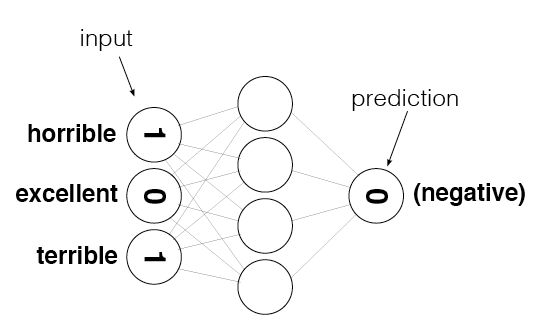

In [17]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

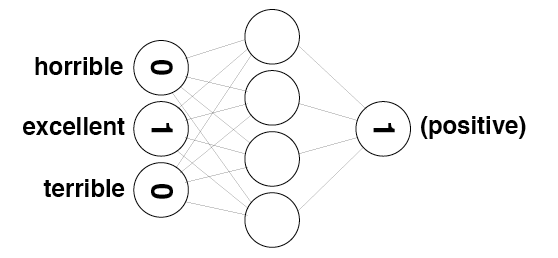

In [18]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

# Project 2: Creating the Input/Output Data<a id='project_2'></a>

**TODO:** Create a [set](https://docs.python.org/3/tutorial/datastructures.html#sets) named `vocab` that contains every word in the vocabulary.

In [21]:
# TODO: Create set named "vocab" containing all of the words from all of the reviews
vocab = set(total_counts)

Run the following cell to check your vocabulary size. If everything worked correctly, it should print **74074**

In [22]:
vocab_size = len(vocab)
print(vocab_size)

74074


Take a look at the following image. It represents the layers of the neural network you'll be building throughout this notebook. `layer_0` is the input layer, `layer_1` is a hidden layer, and `layer_2` is the output layer.

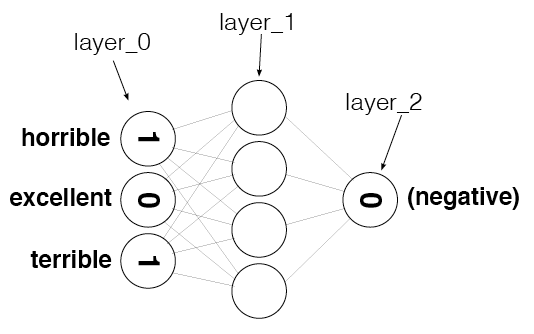

In [23]:
from IPython.display import Image
Image(filename='sentiment_network_2.png')

**TODO:** Create a numpy array called `layer_0` and initialize it to all zeros. You will find the [zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) function particularly helpful here. Be sure you create `layer_0` as a 2-dimensional matrix with 1 row and `vocab_size` columns. 

In [58]:
# TODO: Create layer_0 matrix with dimensions 1 by vocab_size, initially filled with zeros
layer_0 = np.zeros((1, vocab_size))

Run the following cell. It should display `(1, 74074)`

In [59]:
layer_0.shape

(1, 74074)

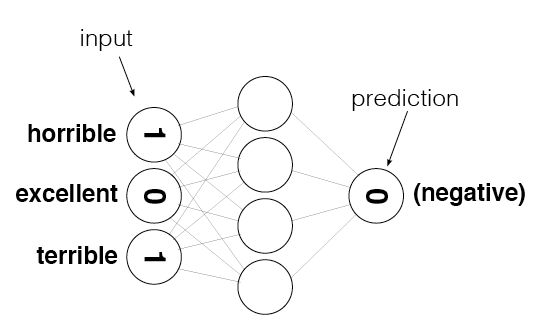

In [60]:
from IPython.display import Image
Image(filename='sentiment_network.png')

`layer_0` contains one entry for every word in the vocabulary, as shown in the above image. We need to make sure we know the index of each word, so run the following cell to create a lookup table that stores the index of every word.

In [73]:
def update_input_layer(review):
    """ Modify the global layer_0 to represent the vector form of review.
    The element at a given index of layer_0 should represent
    how many times the given word occurs in the review.
    Args:
        review(string) - the string of the review
    Returns:
        None
    """
    global layer_0
    # clear out previous state by resetting the layer to be all 0s
    layer_0 *= 0
    
    # TODO: count how many times each word is used in the given review and store the results in layer_0 
    for word in review.split(' '):
        layer_0[0][word2index[word]]+= 1

In [74]:
# Create a dictionary of words in the vocabulary mapped to index positions
# (to be used in layer_0)
word2index = {}
for i,word in enumerate(vocab):
    word2index[word] = i
    
# display the map of words to indices
word2index

{'': 0,
 'salvages': 1,
 'shere': 2,
 'dunnit': 3,
 'handsome': 4,
 'drudgeries': 5,
 'zombiefest': 6,
 'niobe': 7,
 'underappreciated': 8,
 'mran': 9,
 'relaxers': 10,
 'contortion': 11,
 'orla': 12,
 'baz': 13,
 'wach': 14,
 'decked': 15,
 'magick': 16,
 'batista': 17,
 'shoddier': 18,
 'witchboard': 19,
 'incomparably': 20,
 'befuddling': 21,
 'walbrook': 22,
 'mozambique': 23,
 'morecambe': 24,
 'invoking': 25,
 'shards': 26,
 'carjacked': 27,
 'eaker': 28,
 'shuttles': 29,
 'exhaustively': 30,
 'folding': 31,
 'spetember': 32,
 'jasbir': 33,
 'warnerscope': 34,
 'wilding': 35,
 'cherubino': 36,
 'mere': 37,
 'bes': 38,
 'poncho': 39,
 'snappily': 40,
 'bragana': 41,
 'involuntary': 42,
 'fancier': 43,
 'pows': 44,
 'relapses': 45,
 'oppenheimer': 46,
 'clansman': 47,
 'haven': 48,
 'clutch': 49,
 'meador': 50,
 'supplant': 51,
 'sneha': 52,
 'unfaltering': 53,
 'gummy': 54,
 'oshin': 55,
 'laslo': 56,
 'nonsenses': 57,
 'slavishly': 58,
 'rosey': 59,
 'motive': 60,
 'picturisation

**TODO:**  Complete the implementation of `update_input_layer`. It should count 
          how many times each word is used in the given review, and then store
          those counts at the appropriate indices inside `layer_0`.

Run the following cell to test updating the input layer with the first review. The indices assigned may not be the same as in the solution, but hopefully you'll see some non-zero values in `layer_0`.  

In [75]:
update_input_layer(reviews[0])
layer_0

array([[ 18.,   0.,   0., ...,   0.,   0.,   0.]])

**TODO:** Complete the implementation of `get_target_for_labels`. It should return `0` or `1`, 
          depending on whether the given label is `NEGATIVE` or `POSITIVE`, respectively.

In [76]:
def get_target_for_label(label):
    """Convert a label to `0` or `1`.
    Args:
        label(string) - Either "POSITIVE" or "NEGATIVE".
    Returns:
        `0` or `1`.
    """
    # TODO: Your code here
    if label == "POSITIVE":
        return 1
    else:
        return 0

Run the following two cells. They should print out`'POSITIVE'` and `1`, respectively.

In [77]:
labels[0]

'POSITIVE'

In [78]:
get_target_for_label(labels[0])

1

Run the following two cells. They should print out `'NEGATIVE'` and `0`, respectively.

In [79]:
labels[1]

'NEGATIVE'

In [80]:
get_target_for_label(labels[1])

0

# End of Project 2. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.

# Project 3: Building a Neural Network<a id='project_3'></a>

**TODO:** We've included the framework of a class called `SentimentNetork`. Implement all of the items marked `TODO` in the code. These include doing the following:
- Create a basic neural network much like the networks you've seen in earlier lessons and in Project 1, with an input layer, a hidden layer, and an output layer. 
- Do **not** add a non-linearity in the hidden layer. That is, do not use an activation function when calculating the hidden layer outputs.
- Re-use the code from earlier in this notebook to create the training data (see `TODO`s in the code)
- Implement the `pre_process_data` function to create the vocabulary for our training data generating functions
- Ensure `train` trains over the entire corpus

### Where to Get Help if You Need it
- Re-watch earlier Udacity lectures
- Chapters 3-5 - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) - (Check inside your classroom for a discount code)

In [87]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        # TODO: populate review_vocab with all of the words in the given reviews
        #       Remember to split reviews into individual words 
        #       using "split(' ')" instead of "split()".
        for review in reviews:
            for word in review.split(' '):
                review_vocab.add(word)
        
        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        # TODO: populate label_vocab with all of the words in the given labels.
        #       There is no need to split the labels because each one is a single word.
        for label in labels:
            label_vocab.add(label)
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        # TODO: populate self.word2index with indices for all the words in self.review_vocab
        #       like you saw earlier in the notebook
        for idx, word in enumerate(self.review_vocab):
            self.word2index[word] = idx
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        # TODO: do the same thing you did for self.word2index and self.review_vocab, 
        #       but for self.label2index and self.label_vocab instead
        for idx, label in enumerate(self.label_vocab):
            self.label2index[label] = idx
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Store the number of nodes in input, hidden, and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights
        
        # TODO: initialize self.weights_0_1 as a matrix of zeros. These are the weights between
        #       the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes, self.hidden_nodes))
        
        # TODO: initialize self.weights_1_2 as a matrix of random values. 
        #       These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                            (self.hidden_nodes, self.output_nodes))
        
        # TODO: Create the input layer, a two-dimensional matrix with shape 
        #       1 x input_nodes, with all values initialized to zero
        self.layer_0 = np.zeros((1,self.input_nodes))
    
        
    def update_input_layer(self,review):
        # TODO: You can copy most of the code you wrote for update_input_layer 
        #       earlier in this notebook. 
        #
        #       However, MAKE SURE YOU CHANGE ALL VARIABLES TO REFERENCE
        #       THE VERSIONS STORED IN THIS OBJECT, NOT THE GLOBAL OBJECTS.
        #       For example, replace "layer_0 *= 0" with "self.layer_0 *= 0"
        # clear out previous state by resetting the layer to be all 0s
        self.layer_0 *= 0
    
        # TODO: count how many times each word is used in the given review and store the results in layer_0 
        for word in review.split(' '):
            if (word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] += 1
                
    def get_target_for_label(self,label):
        # TODO: Copy the code you wrote for get_target_for_label 
        #       earlier in this notebook. 
        if label == "POSITIVE":
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        # TODO: Return the result of calculating the sigmoid activation function
        #       shown in the lectures
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        # TODO: Return the derivative of the sigmoid activation function, 
        #       where "output" is the original output from the sigmoid fucntion 
        return output * (1 - output)

    def train(self, training_reviews, training_labels):
        
        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0
        
        # Remember when we started for printing time statistics
        start = time.time()

        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # TODO: Get the next review and its correct label
            review = training_reviews[i]
            label = training_labels[i]
            
            # TODO: Implement the forward pass through the network. 
            #       That means use the given review to update the input layer, 
            #       then calculate values for the hidden layer,
            #       and finally calculate the output layer.
            # 
            #       Do not use an activation function for the hidden layer,
            #       but use the sigmoid activation function for the output layer.
            self.update_input_layer(review)
            hidden_layer = self.layer_0.dot(self.weights_0_1)
            output_layer = self.sigmoid(hidden_layer.dot(self.weights_1_2))
            
            # TODO: Implement the back propagation pass here. 
            #       That means calculate the error for the forward pass's prediction
            #       and update the weights in the network according to their
            #       contributions toward the error, as calculated via the
            #       gradient descent and back propagation algorithms you 
            #       learned in class.
            output_error = output_layer - self.get_target_for_label(label)
            output_delta = output_layer * self.sigmoid_output_2_derivation(output_layer)
            
            hidden_error = output_delta.dot(self.weights_1_2.T)
            hidden_delta = hidden_error
            
            self.weights_1_2 -= hidden_layer.T.dot(output_delta) * self.learning_rate
            self.weights_0_1 -= self.hidden_layer.T.dot(hidden_delta) * self.learning_rate
            
            # TODO: Keep track of correct predictions. To determine if the prediction was
            #       correct, check that the absolute value of the output error 
            #       is less than 0.5. If so, add one to the correct_so_far count.
            if (np.abs(output_error) < 0.5):
                correct_so_far += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # keep track of how many correct predictions we make
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        # TODO: Run a forward pass through the network, like you did in the
        #       "train" function. That means use the given review to 
        #       update the input layer, then calculate values for the hidden layer,
        #       and finally calculate the output layer.
        #
        #       Note: The review passed into this function for prediction 
        #             might come from anywhere, so you should convert it 
        #             to lower case prior to using it.
        self.update_input_layer(review.lower())
        hidden_layer = self.layer_0.dot(self.weights_0_1)
        output_layer = self.sigmoid(hidden_layer.dot(self.weights_1_2))
        
        # TODO: The output layer should now contain a prediction. 
        #       Return `POSITIVE` for predictions greater-than-or-equal-to `0.5`, 
        #       and `NEGATIVE` otherwise.
        if (output_layer[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"


Run the following cell to create a `SentimentNetwork` that will train on all but the last 1000 reviews (we're saving those for testing). Here we use a learning rate of `0.1`.

In [88]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

Run the following cell to test the network's performance against the last 1000 reviews (the ones we held out from our training set). 

**We have not trained the model yet, so the results should be about 50% as it will just be guessing and there are only two possible values to choose from.**

In [89]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:0.1% Speed(reviews/sec):15.81 #Correct:1 #Tested:2 Testing Accuracy:50.0%

IndexError: index 73637 is out of bounds for axis 0 with size 72810

Run the following cell to actually train the network. During training, it will display the model's accuracy repeatedly as it trains so you can see how well it's doing.

In [ ]:
mlp.train(reviews[:-1000],labels[:-1000])

That most likely didn't train very well. Part of the reason may be because the learning rate is too high. Run the following cell to recreate the network with a smaller learning rate, `0.01`, and then train the new network.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

That probably wasn't much different. Run the following cell to recreate the network one more time with an even smaller learning rate, `0.001`, and then train the new network.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)
mlp.train(reviews[:-1000],labels[:-1000])

With a learning rate of `0.001`, the network should finall have started to improve during training. It's still not very good, but it shows that this solution has potential. We will improve it in the next lesson.

# End of Project 3. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.

# Understanding Neural Noise<a id='lesson_4'></a>

The following cells include includes the code Andrew shows in the next video. We've included it here so you can run the cells along with the video without having to type in everything.

In [ ]:
from IPython.display import Image
Image(filename='sentiment_network.png')

In [ ]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [ ]:
layer_0

In [ ]:
review_counter = Counter()

In [ ]:
for word in reviews[0].split(" "):
    review_counter[word] += 1

In [ ]:
review_counter.most_common()

# Project 4: Reducing Noise in Our Input Data<a id='project_4'></a>

**TODO:** Attempt to reduce the noise in the input data like Andrew did in the previous video. Specifically, do the following:
* Copy the `SentimentNetwork` class you created earlier into the following cell.
* Modify `update_input_layer` so it does not count how many times each word is used, but rather just stores whether or not a word was used. 

In [ ]:
# TODO: -Copy the SentimentNetwork class from Projet 3 lesson
#       -Modify it to reduce noise, like in the video 

Run the following cell to recreate the network and train it. Notice we've gone back to the higher learning rate of `0.1`.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)
mlp.train(reviews[:-1000],labels[:-1000])

That should have trained much better than the earlier attempts. It's still not wonderful, but it should have improved dramatically. Run the following cell to test your model with 1000 predictions.

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

# End of Project 4. 
## Andrew's solution was actually in the previous video, so rewatch that video if you had any problems with that project. Then continue on to the next lesson.
# Analyzing Inefficiencies in our Network<a id='lesson_5'></a>
The following cells include the code Andrew shows in the next video. We've included it here so you can run the cells along with the video without having to type in everything.

In [ ]:
Image(filename='sentiment_network_sparse.png')

In [ ]:
layer_0 = np.zeros(10)

In [ ]:
layer_0

In [ ]:
layer_0[4] = 1
layer_0[9] = 1

In [ ]:
layer_0

In [ ]:
weights_0_1 = np.random.randn(10,5)

In [ ]:
layer_0.dot(weights_0_1)

In [ ]:
indices = [4,9]

In [ ]:
layer_1 = np.zeros(5)

In [ ]:
for index in indices:
    layer_1 += (1 * weights_0_1[index])

In [ ]:
layer_1

In [ ]:
Image(filename='sentiment_network_sparse_2.png')

In [ ]:
layer_1 = np.zeros(5)

In [ ]:
for index in indices:
    layer_1 += (weights_0_1[index])

In [ ]:
layer_1

# Project 5: Making our Network More Efficient<a id='project_5'></a>
**TODO:** Make the `SentimentNetwork` class more efficient by eliminating unnecessary multiplications and additions that occur during forward and backward propagation. To do that, you can do the following:
* Copy the `SentimentNetwork` class from the previous project into the following cell.
* Remove the `update_input_layer` function - you will not need it in this version.
* Modify `init_network`:
>* You no longer need a separate input layer, so remove any mention of `self.layer_0`
>* You will be dealing with the old hidden layer more directly, so create `self.layer_1`, a two-dimensional matrix with shape 1 x hidden_nodes, with all values initialized to zero
* Modify `train`:
>* Change the name of the input parameter `training_reviews` to `training_reviews_raw`. This will help with the next step.
>* At the beginning of the function, you'll want to preprocess your reviews to convert them to a list of indices (from `word2index`) that are actually used in the review. This is equivalent to what you saw in the video when Andrew set specific indices to 1. Your code should create a local `list` variable named `training_reviews` that should contain a `list` for each review in `training_reviews_raw`. Those lists should contain the indices for words found in the review.
>* Remove call to `update_input_layer`
>* Use `self`'s  `layer_1` instead of a local `layer_1` object.
>* In the forward pass, replace the code that updates `layer_1` with new logic that only adds the weights for the indices used in the review.
>* When updating `weights_0_1`, only update the individual weights that were used in the forward pass.
* Modify `run`:
>* Remove call to `update_input_layer` 
>* Use `self`'s  `layer_1` instead of a local `layer_1` object.
>* Much like you did in `train`, you will need to pre-process the `review` so you can work with word indices, then update `layer_1` by adding weights for the indices used in the review.

In [ ]:
# TODO: -Copy the SentimentNetwork class from Project 4 lesson
#       -Modify it according to the above instructions 

Run the following cell to recreate the network and train it once again.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)
mlp.train(reviews[:-1000],labels[:-1000])

That should have trained much better than the earlier attempts. Run the following cell to test your model with 1000 predictions.

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

# End of Project 5. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.
# Further Noise Reduction<a id='lesson_6'></a>

In [ ]:
Image(filename='sentiment_network_sparse_2.png')

In [ ]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

In [ ]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

In [ ]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

In [ ]:
hist, edges = np.histogram(list(map(lambda x:x[1],pos_neg_ratios.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="Word Positive/Negative Affinity Distribution")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

In [ ]:
frequency_frequency = Counter()

for word, cnt in total_counts.most_common():
    frequency_frequency[cnt] += 1

In [ ]:
hist, edges = np.histogram(list(map(lambda x:x[1],frequency_frequency.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="The frequency distribution of the words in our corpus")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

# Project 6: Reducing Noise by Strategically Reducing the Vocabulary<a id='project_6'></a>

**TODO:** Improve `SentimentNetwork`'s performance by reducing more noise in the vocabulary. Specifically, do the following:
* Copy the `SentimentNetwork` class from the previous project into the following cell.
* Modify `pre_process_data`:
>* Add two additional parameters: `min_count` and `polarity_cutoff`
>* Calculate the positive-to-negative ratios of words used in the reviews. (You can use code you've written elsewhere in the notebook, but we are moving it into the class like we did with other helper code earlier.)
>* Andrew's solution only calculates a postive-to-negative ratio for words that occur at least 50 times. This keeps the network from attributing too much sentiment to rarer words. You can choose to add this to your solution if you would like.  
>* Change so words are only added to the vocabulary if they occur in the vocabulary more than `min_count` times.
>* Change so words are only added to the vocabulary if the absolute value of their postive-to-negative ratio is at least `polarity_cutoff`
* Modify `__init__`:
>* Add the same two parameters (`min_count` and `polarity_cutoff`) and use them when you call `pre_process_data`

In [ ]:
# TODO: -Copy the SentimentNetwork class from Project 5 lesson
#       -Modify it according to the above instructions 

Run the following cell to train your network with a small polarity cutoff.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.05,learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

And run the following cell to test it's performance. It should be 

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

Run the following cell to train your network with a much larger polarity cutoff.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.8,learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

And run the following cell to test it's performance.

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

# End of Project 6. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.

# Analysis: What's Going on in the Weights?<a id='lesson_7'></a>

In [ ]:
mlp_full = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=0,polarity_cutoff=0,learning_rate=0.01)

In [ ]:
mlp_full.train(reviews[:-1000],labels[:-1000])

In [ ]:
Image(filename='sentiment_network_sparse.png')

In [ ]:
def get_most_similar_words(focus = "horrible"):
    most_similar = Counter()

    for word in mlp_full.word2index.keys():
        most_similar[word] = np.dot(mlp_full.weights_0_1[mlp_full.word2index[word]],mlp_full.weights_0_1[mlp_full.word2index[focus]])
    
    return most_similar.most_common()

In [ ]:
get_most_similar_words("excellent")

In [ ]:
get_most_similar_words("terrible")

In [ ]:
import matplotlib.colors as colors

words_to_visualize = list()
for word, ratio in pos_neg_ratios.most_common(500):
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)
    
for word, ratio in list(reversed(pos_neg_ratios.most_common()))[0:500]:
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)

In [ ]:
pos = 0
neg = 0

colors_list = list()
vectors_list = list()
for word in words_to_visualize:
    if word in pos_neg_ratios.keys():
        vectors_list.append(mlp_full.weights_0_1[mlp_full.word2index[word]])
        if(pos_neg_ratios[word] > 0):
            pos+=1
            colors_list.append("#00ff00")
        else:
            neg+=1
            colors_list.append("#000000")

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
words_top_ted_tsne = tsne.fit_transform(vectors_list)

In [ ]:
p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="vector T-SNE for most polarized words")

source = ColumnDataSource(data=dict(x1=words_top_ted_tsne[:,0],
                                    x2=words_top_ted_tsne[:,1],
                                    names=words_to_visualize,
                                    color=colors_list))

p.scatter(x="x1", y="x2", size=8, source=source, fill_color="color")

word_labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(word_labels)

show(p)

# green indicates positive words, black indicates negative words